## EDA e Engenharia de atributos com SQL (AWS Athena e S3)

### Sobre o conjunto de dados:

*Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas*. [kaggle]('https://www.kaggle.com/datasets/spscientist/students-performance-in-exams')

### Motivação:

*Compreender a influência dos antecedentes dos pais, preparação para testes, etc., no desempenho dos alunos*. [kaggle]('https://www.kaggle.com/datasets/spscientist/students-performance-in-exams')

### Pré-processamento

Para instanciar os dados no AWS S3, devemos realizar o pré-processamento. Devemos garantir que os dados estejam estruturados em formato tabular, e garantir que eventuais caracteres não causarão problema para sintaxe dos comandos SQL.

Portanto, devemos tratar palavras reservadas, acentuações, espaços em branco, etc.

Para isso, vamos carregar os dados no python, e trata-los.

Observando os dados na fonte, percebemos a existência de um atributo, cujas categorias podem interessar serem particionadas:

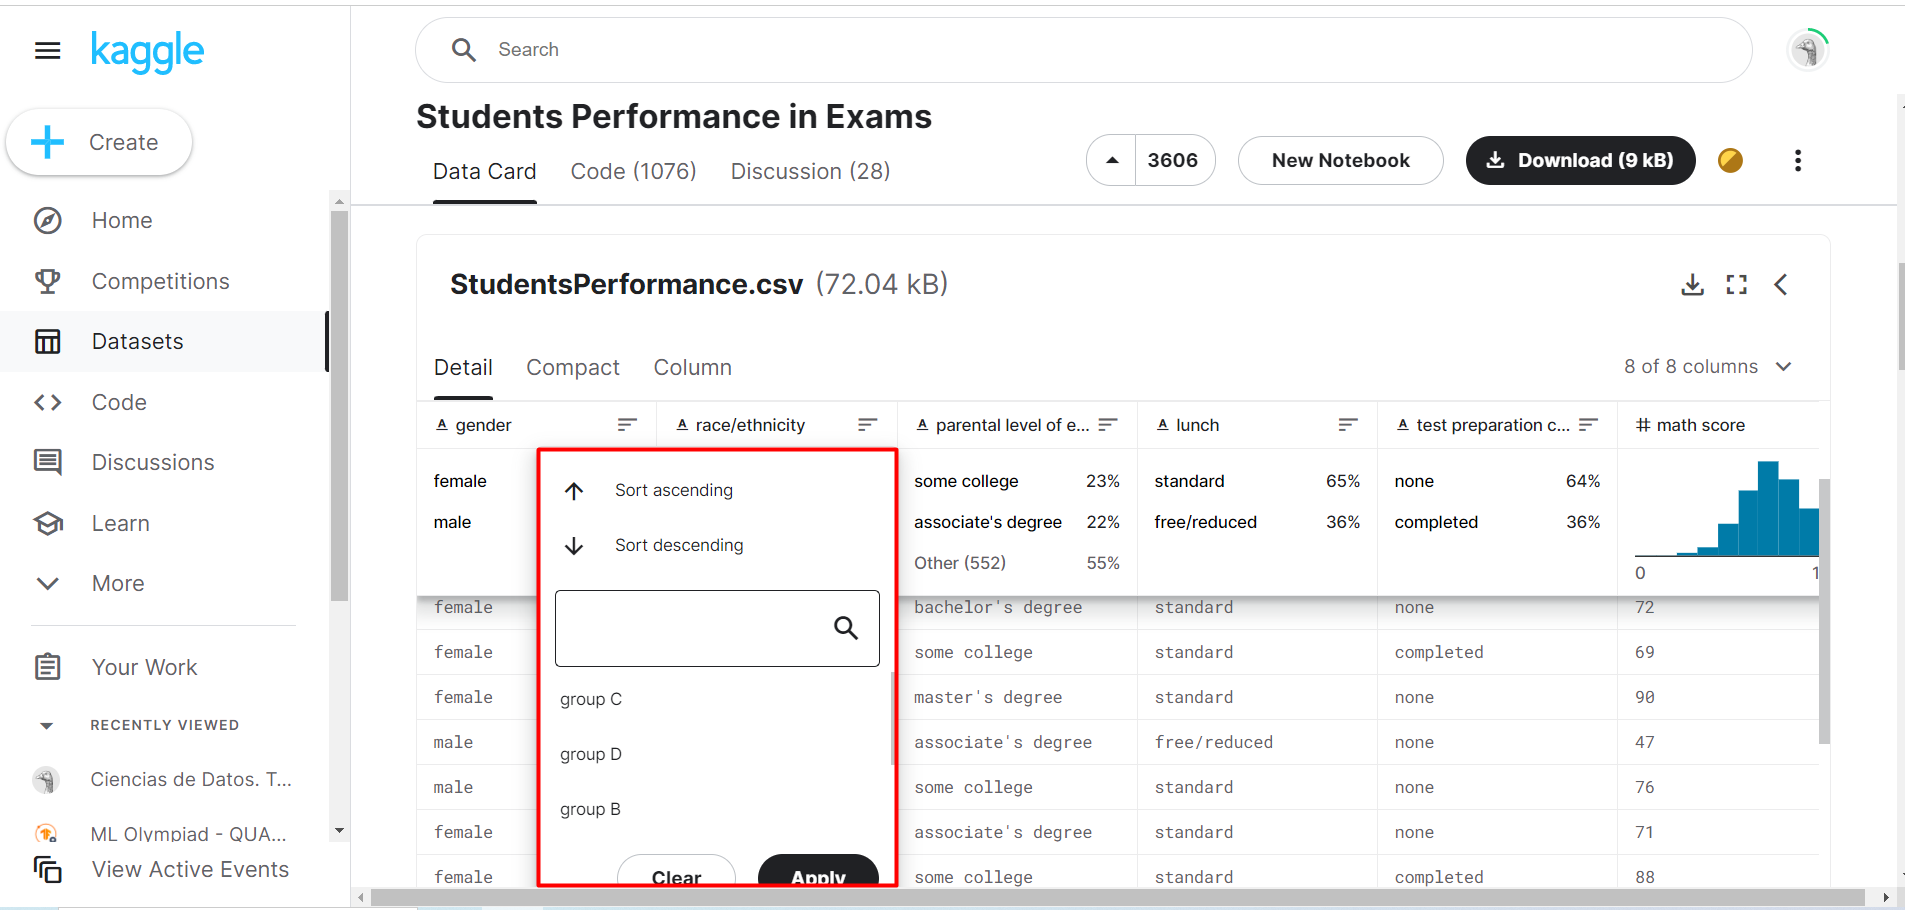

Dados em .csv:

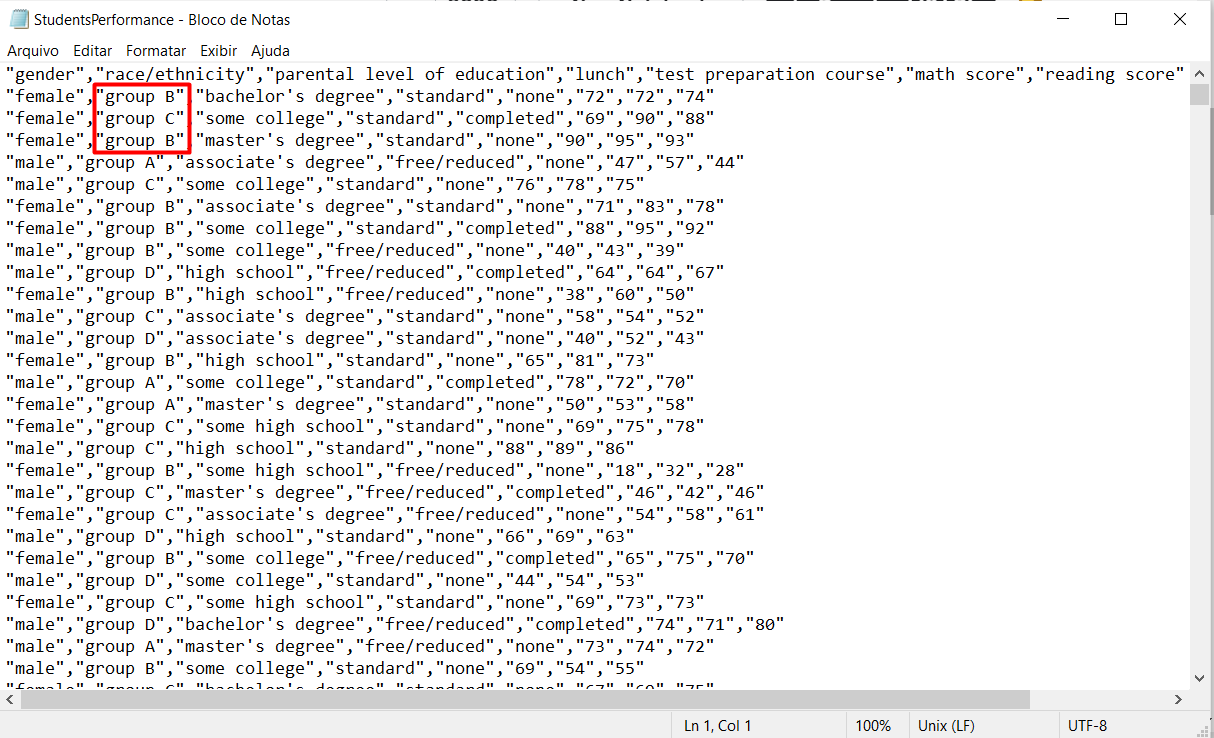


## Dicionário de dados


|Coluna|Descrição|
-------|----------
gender|sexo|
group| Etnia|
parental_level_of_education| Nível de educação dos país|
lunch| Almoço padrão ou pago|
test_preparation_course| Curso prepatório para os testes?|
math_score| Pontuação em matemática|
reading_score| Pontuação em leitura|
writing_score| Pontuação em escrita|

Vamos particionar os dados por 'groups', portanto, após o tratamento.

In [44]:
# Importanto módulos
import pandas as pd
import re


# Criando classe para pré-processamento e split dos dados

class pre_processing(object):
    
    def __init__(self, dataframe = pd.DataFrame):
        
        self.data = pd.DataFrame(dataframe)
        

    #método para limpar espaços vazios, e substituir letras com acentuação.
    
    def empty_replace_columns(self, char_columns: list = None):
        
        #altere aqui o caractere que deseja eliminar
        self.data.columns = [i.replace(" ", "_") for i in data.columns]
        
        if char_columns is not None:
       
          for char in char_columns:
          #altere aqui o caractere que deseja eliminar
            self.data.columns = [i.replace(f"{char}", "") for i in data.columns]
            
        for coluna in self.data.select_dtypes('object').columns:
        
            self.data[coluna] = self.data[coluna].apply(lambda x: x.replace(" ", "_"))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: x.lower())
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[áàãâä]', 'a', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[éèêë]', 'e', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[íìîï]', 'i', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[óòõôö]', 'o', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[úùûü]', 'u', x))
        
            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r'[ç]', 'c', x))

            self.data[coluna] = self.data[coluna].apply(lambda x: re.sub(r"['’]", '', x))
        
        setattr(self, "data", self.data)


    #retornar fatores - para conhecimento   
    def factors(self, coluna: str):

          return pd.factorize(self.data[coluna])[1]


    #faz o split dos dados, salva .csv com nome do fator (para cada fator), retorna atributo para a classe      
    def split(self, coluna: str):

          categorias = pd.factorize(self.data[coluna])[1]
          
          for i, fator in enumerate(categorias):

              df = self.data.query('{} == "{}"'.format(coluna, fator)).reset_index(drop = True)

              df.drop([coluna], axis = 1, inplace = True)

              df.to_csv(str(fator)+'.csv', header = False, index = False)

              setattr(self, str(fator), df)

In [45]:
# Instanciando dados

data = pd.DataFrame(pd.read_csv("StudentsPerformance.csv"))

In [47]:
# Instanciando dados na classe

dados = pre_processing(dataframe = data)

# Visualizando dados

dados.data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [48]:
# Aplicando pré-processamento

dados.empty_replace_columns(['/'])

# Visualizando resultado

dados.data

,gender,raceethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group_b,bachelors_degree,standard,none,72,72,74
1,female,group_c,some_college,standard,completed,69,90,88
2,female,group_b,masters_degree,standard,none,90,95,93
3,male,group_a,associates_degree,free/reduced,none,47,57,44
4,male,group_c,some_college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group_e,masters_degree,standard,completed,88,99,95
996,male,group_c,high_school,free/reduced,none,62,55,55
997,female,group_c,high_school,free/reduced,completed,59,71,65
998,female,group_d,some_college,standard,completed,68,78,77


In [49]:
# Visualizando fatores, para particionamento da base

dados.factors(coluna = 'raceethnicity')


Index(['group_b', 'group_c', 'group_a', 'group_d', 'group_e'], dtype='object')

In [50]:
# Realizando split

dados.split(coluna = 'raceethnicity')

In [51]:
# Visualizando partição

dados.group_a

,gender,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,associates_degree,free/reduced,none,47,57,44
1,male,some_college,standard,completed,78,72,70
2,female,masters_degree,standard,none,50,53,58
3,male,masters_degree,free/reduced,none,73,74,72
4,female,associates_degree,standard,completed,55,65,62
...,...,...,...,...,...,...,...
84,female,some_college,standard,none,54,63,67
85,female,some_college,standard,completed,78,87,91
86,male,high_school,standard,none,57,51,54
87,female,some_high_school,free/reduced,none,44,45,45


Conforme se observa do código da classe criada, ao se aplicar o método "split()" foi realizado o particionamento e criado, no diretório de trabalho, um arquivo para cada categoria do atributo escolhido, com extensão .csv.

A seguir, vamos instanciar a base particionada no AWS S3, e dar início à análise exploratória, usando comandos SQL.

## Instanciando base de dados no AWS S3


### 1 - Acesse o serviço "S3" da AWS, e crie um novo "bucket":

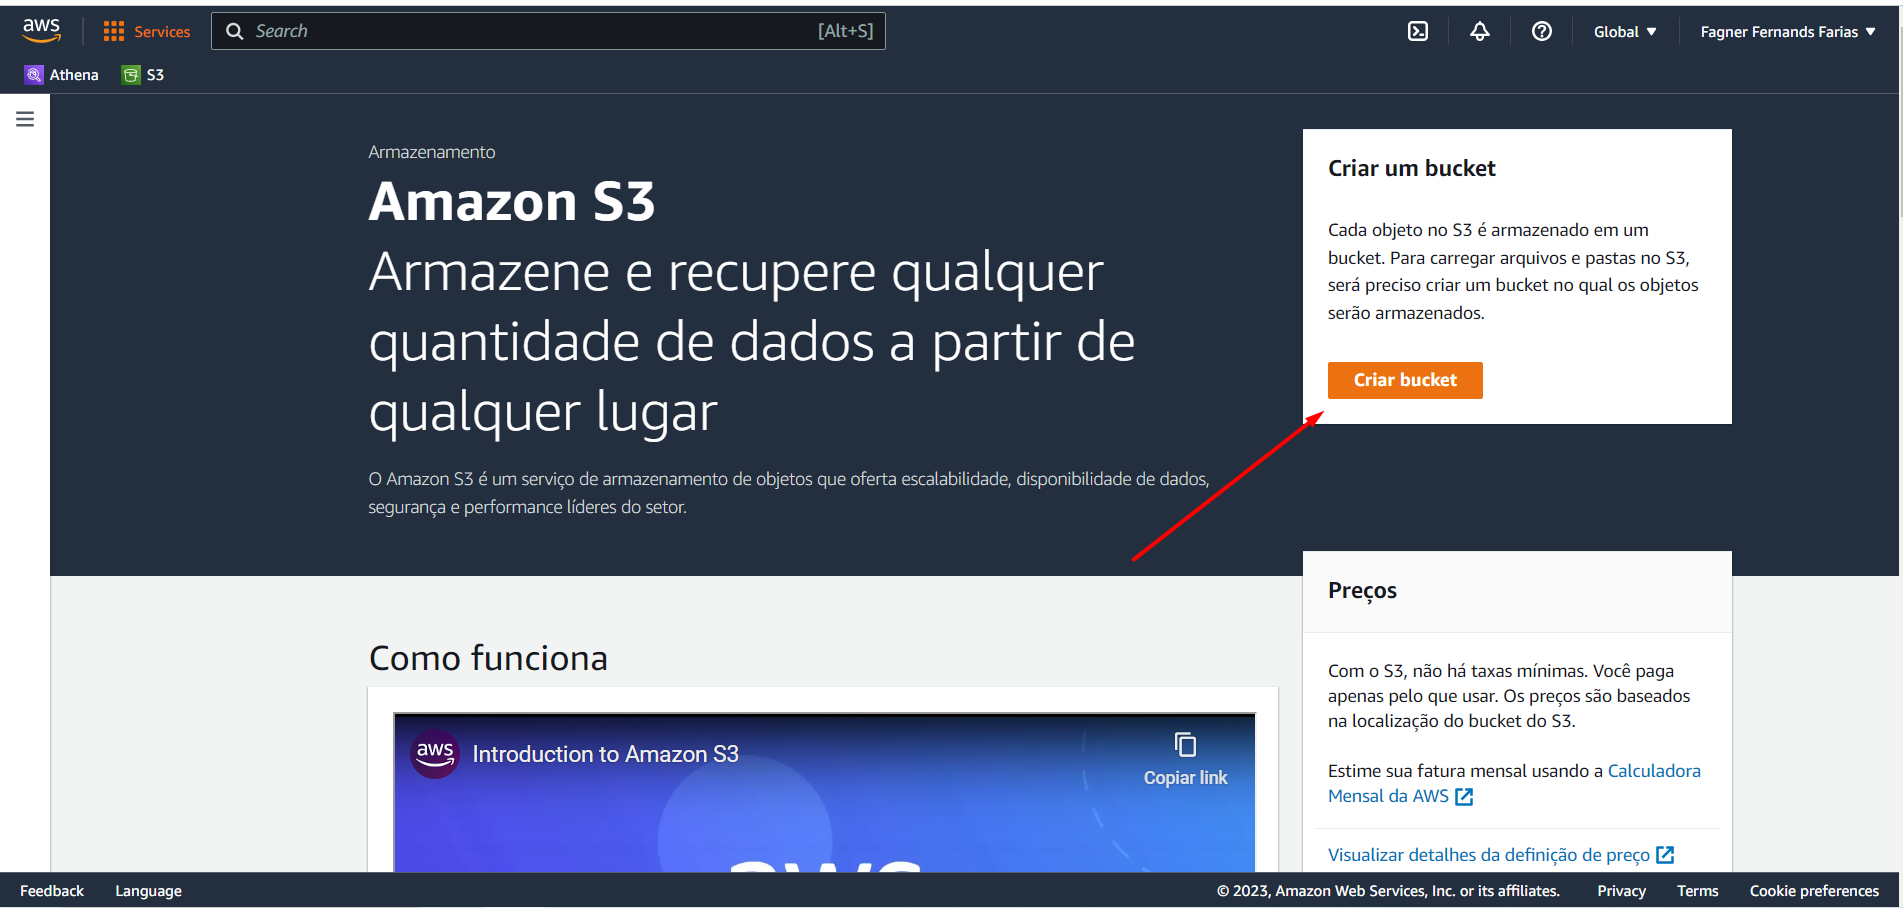


1.1 Criando um bucket para receber os dados particionados:

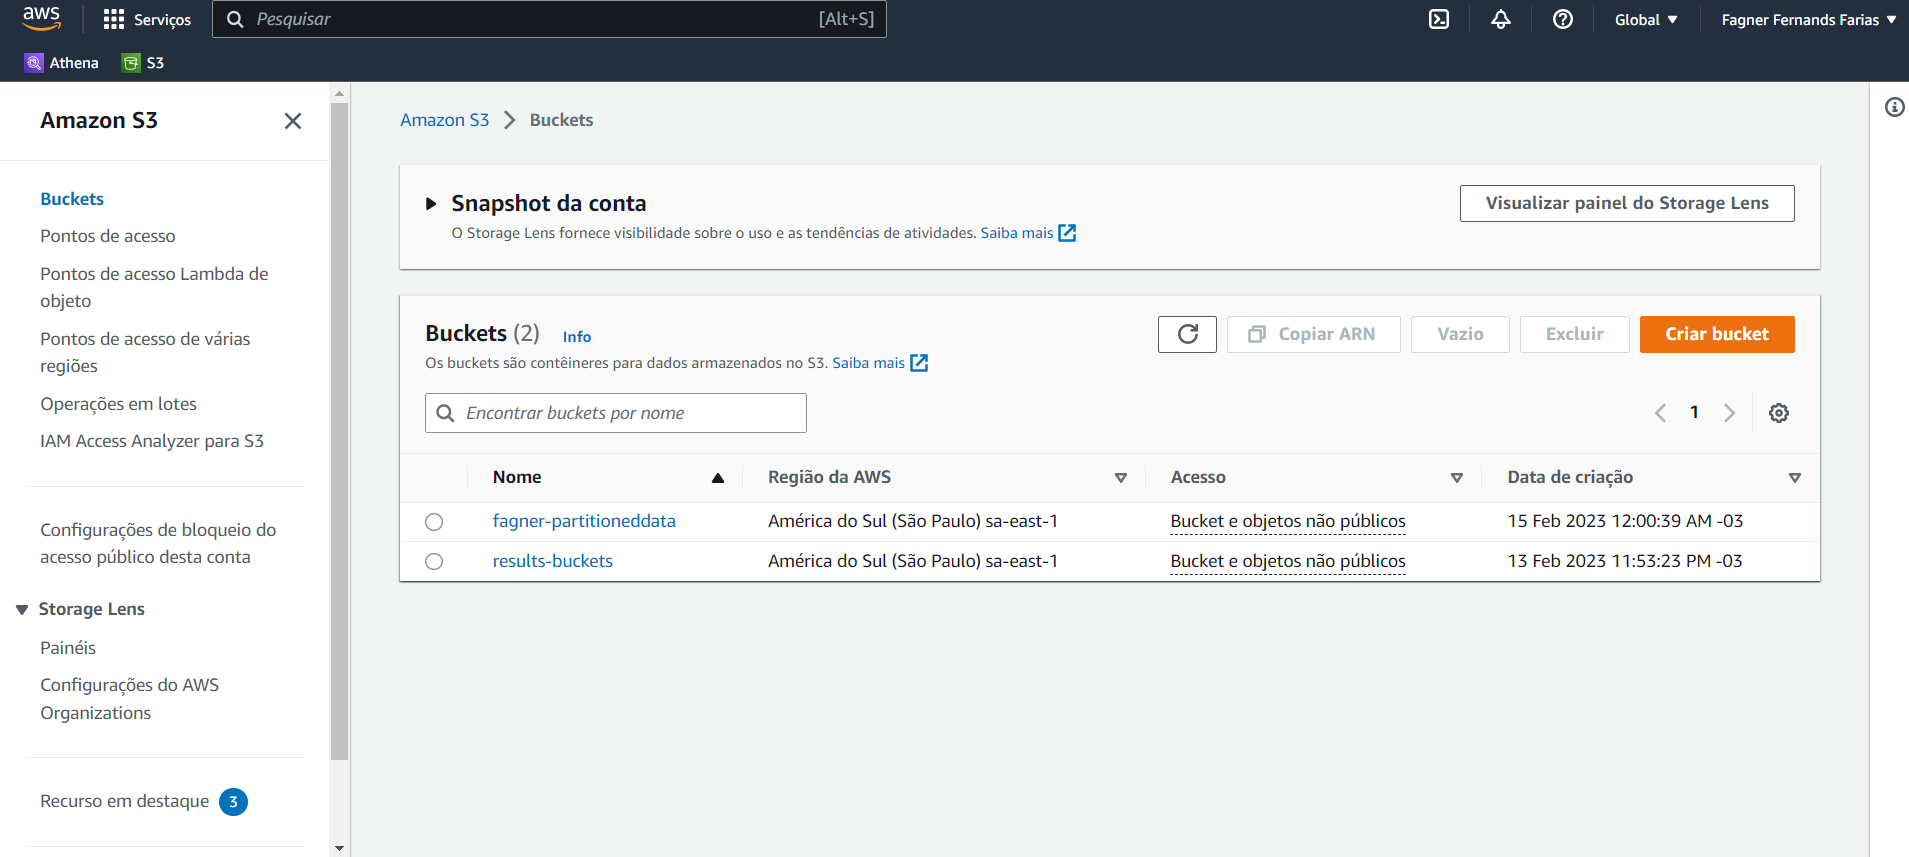

2 - Crie um bucket para armazenar o resultado das querys:

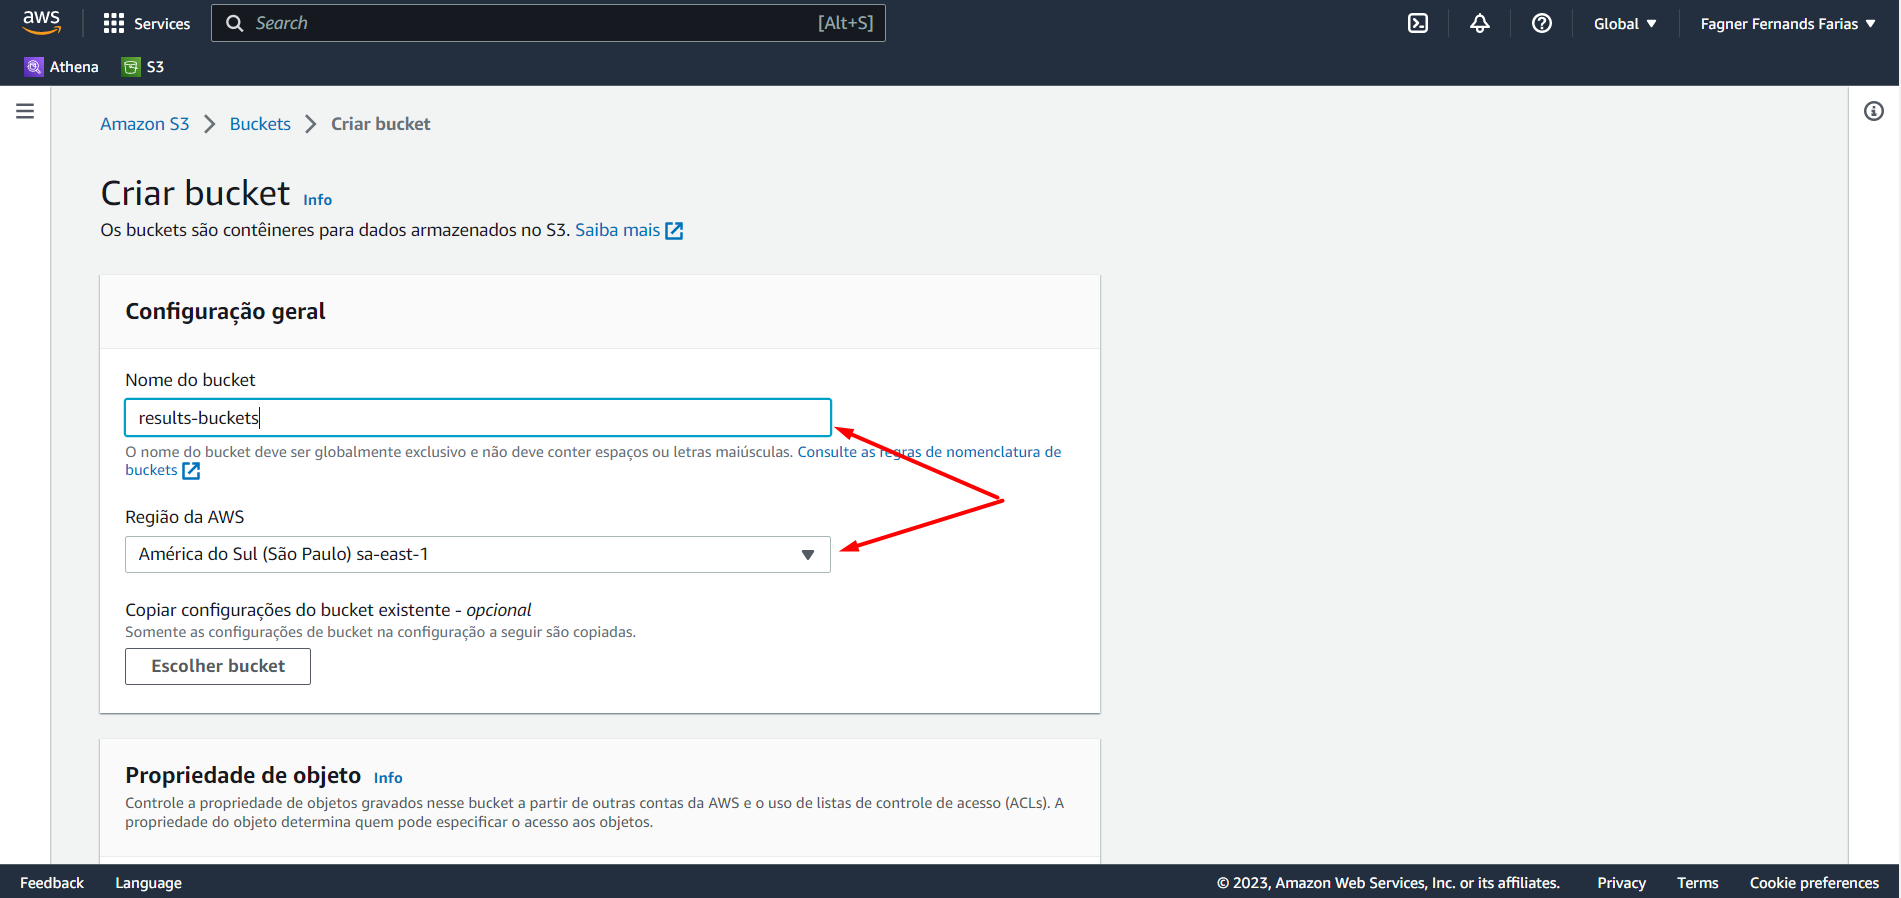

Agora, ao invés de criar pasta por pasta, e anexar arquivo por arquivo no bucket, vamos fazer esta tarefa no próprio sistema operacional, estruturando as pastas desta forma:
  - \<nome_do_atributo>=\<categoria_particionada>

E, dentro de cada pasta, insira o arquivo particionado:

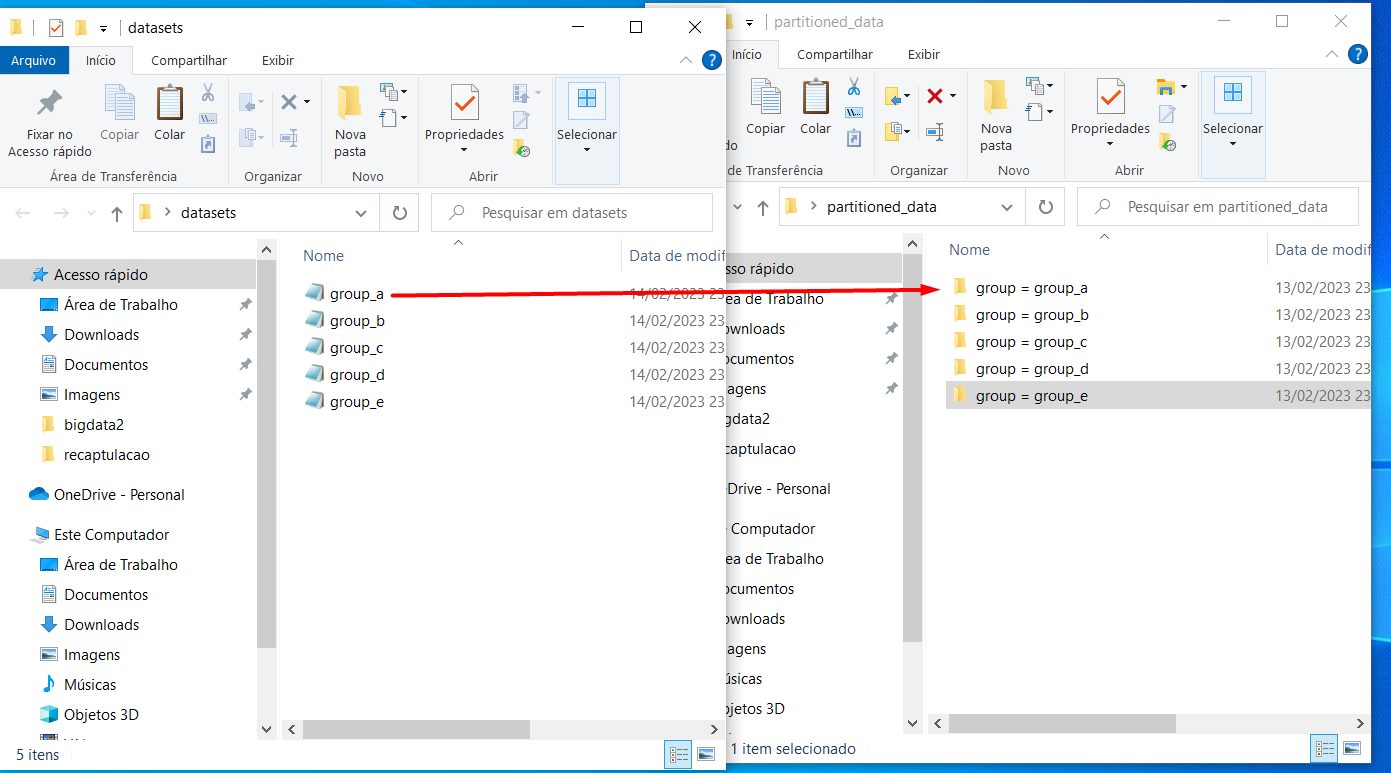



Por fim, transfira as sub-pastas, contendo os arquivos, para o bucket partitioned_data:

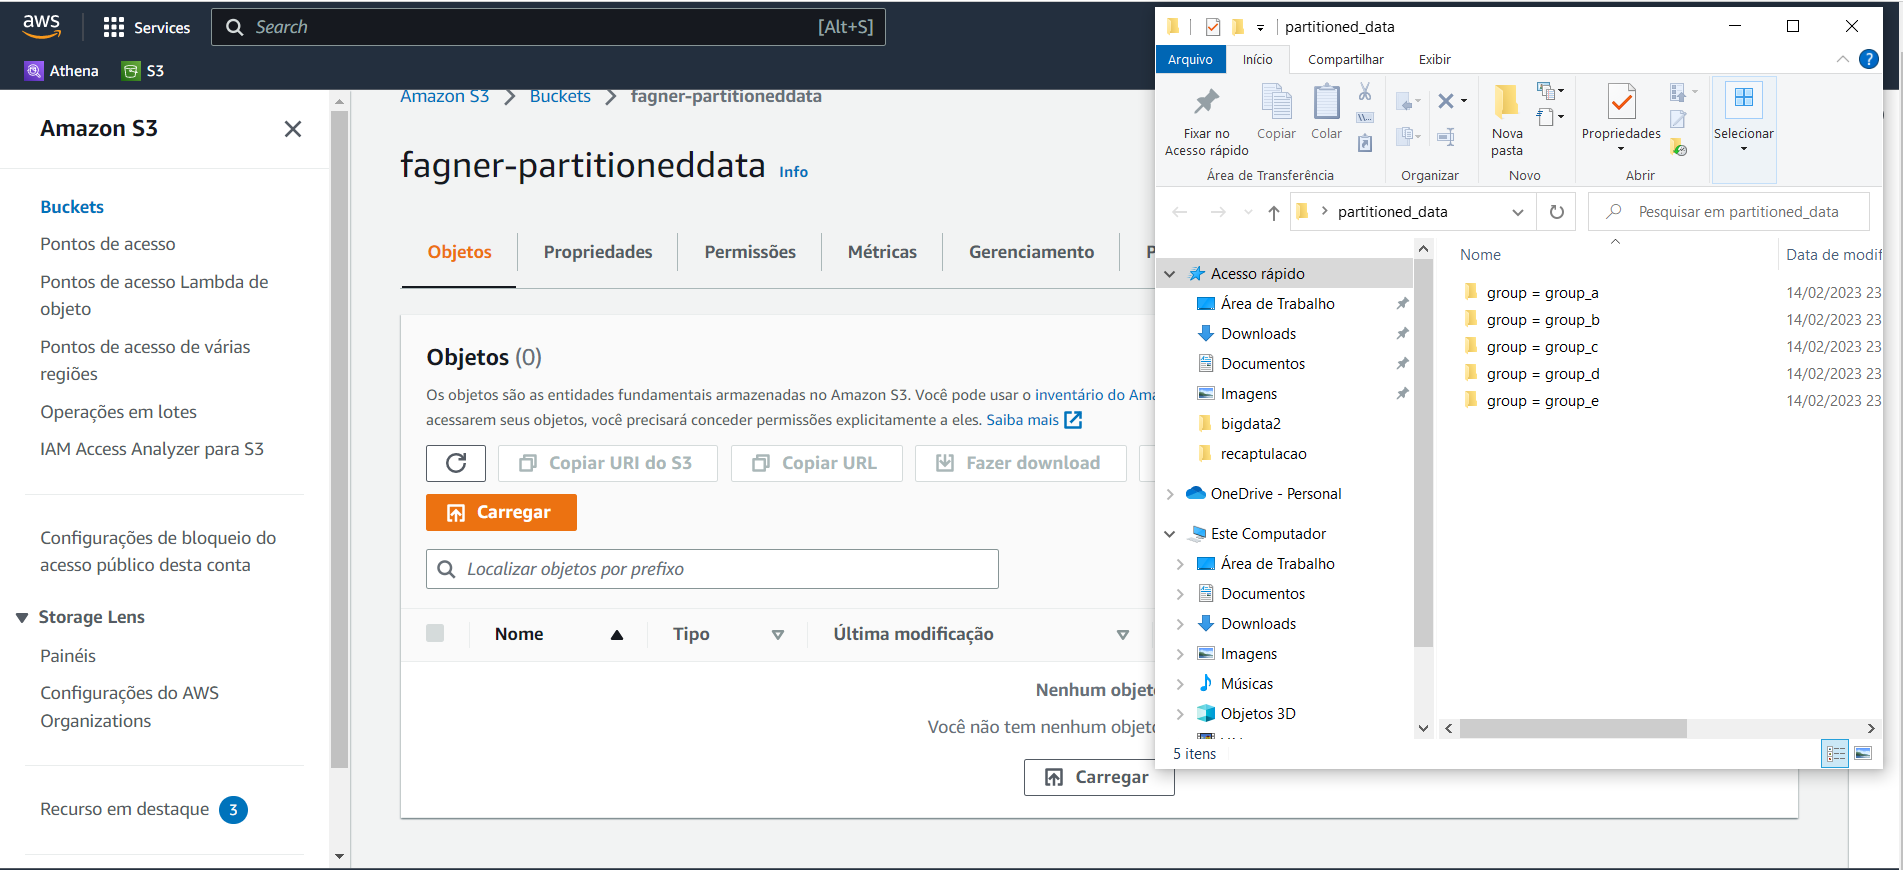

Ao estarem carregados, você terá essa estrutura:

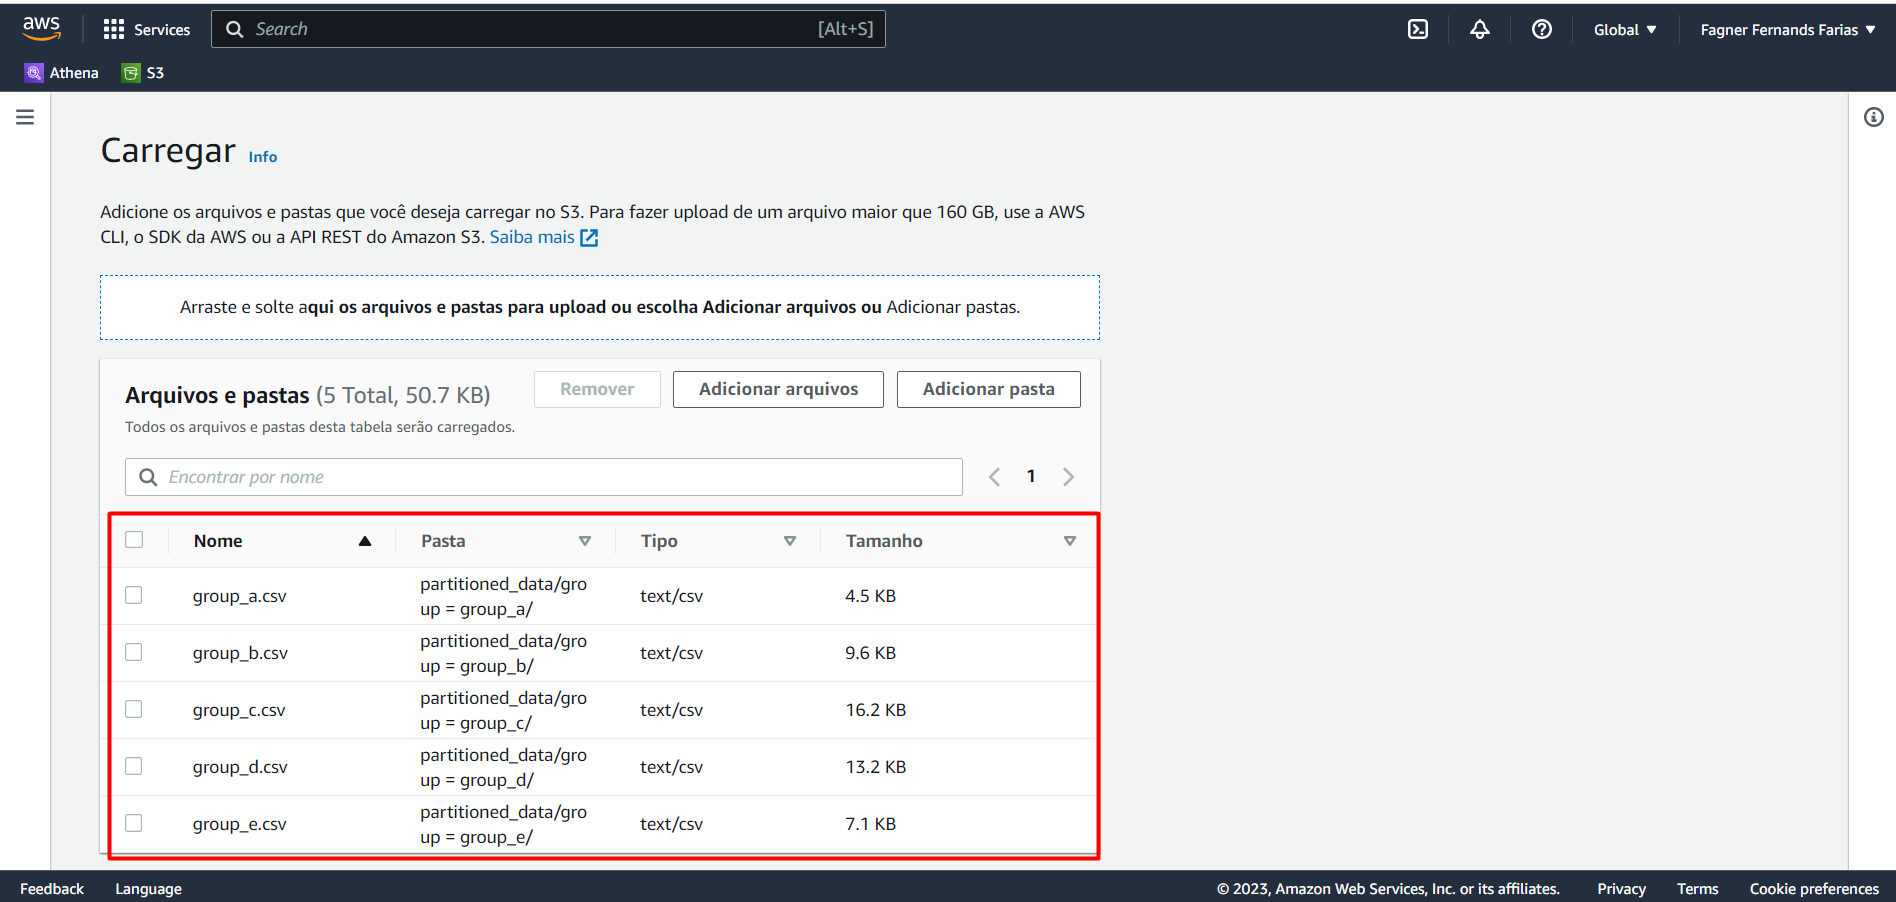

E, com isso, o trabalho no S3 está terminando, de agora em diante, tudo será realizado no AWS Athena.

Acessando athena e definindo bucket para receber resultado das querys:

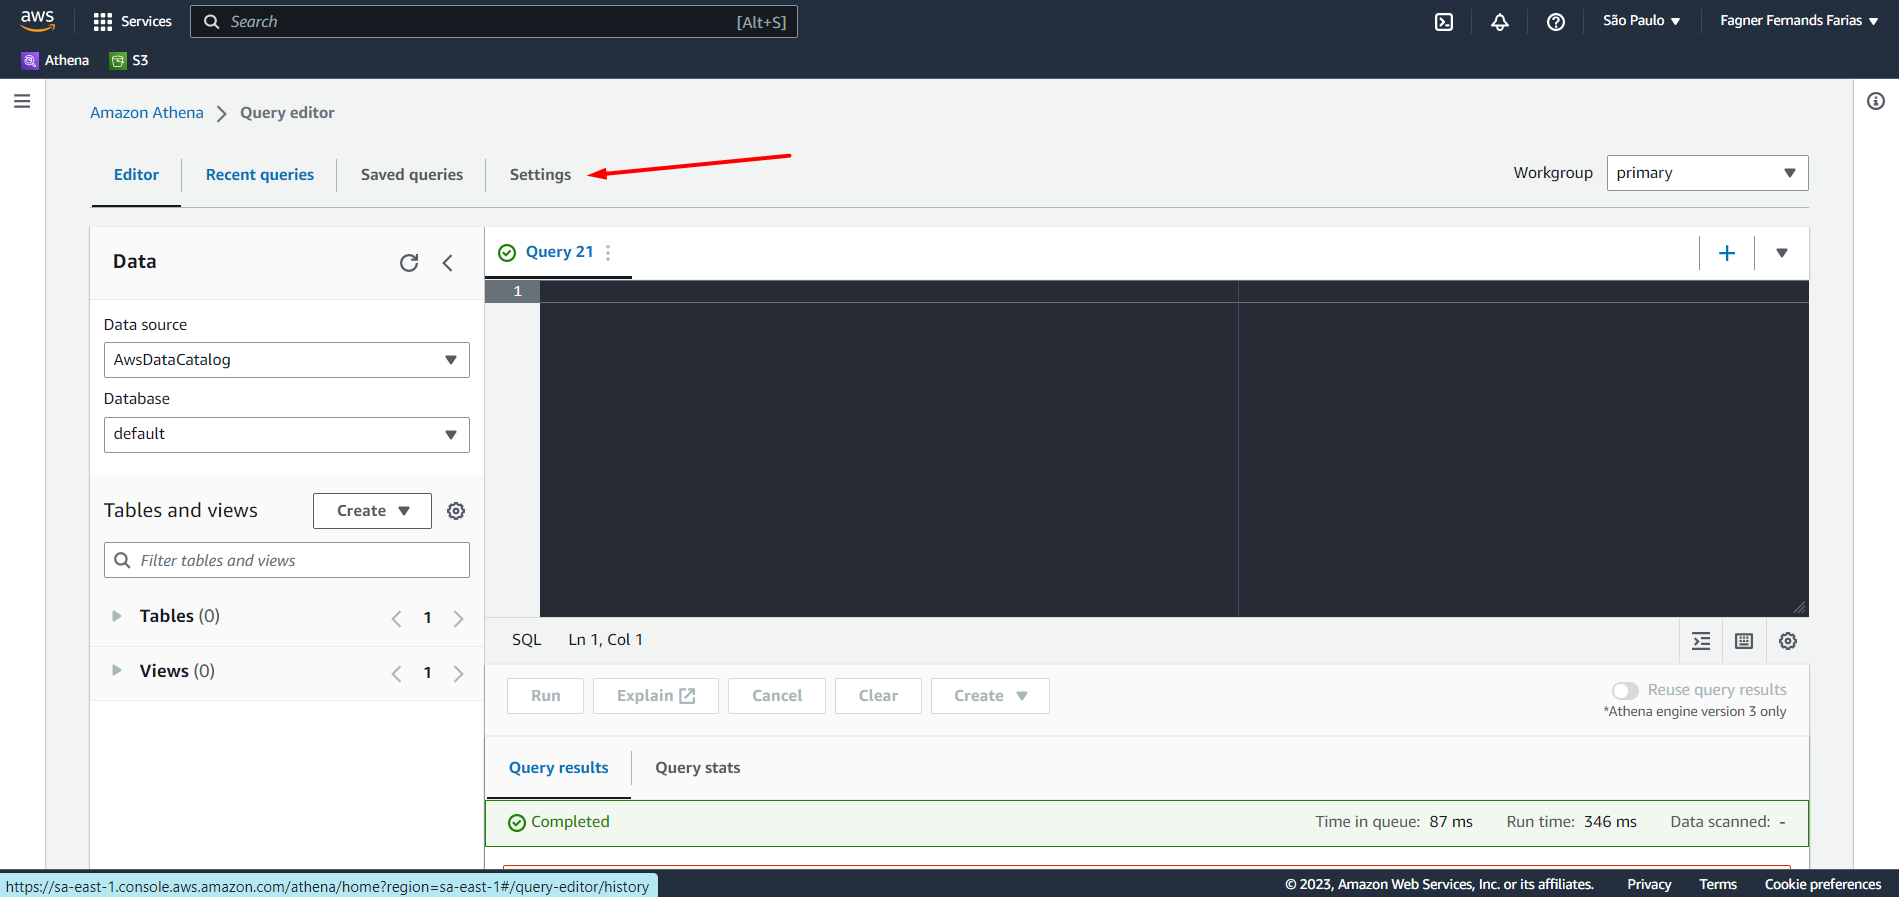

Definindo bucket para resultados:

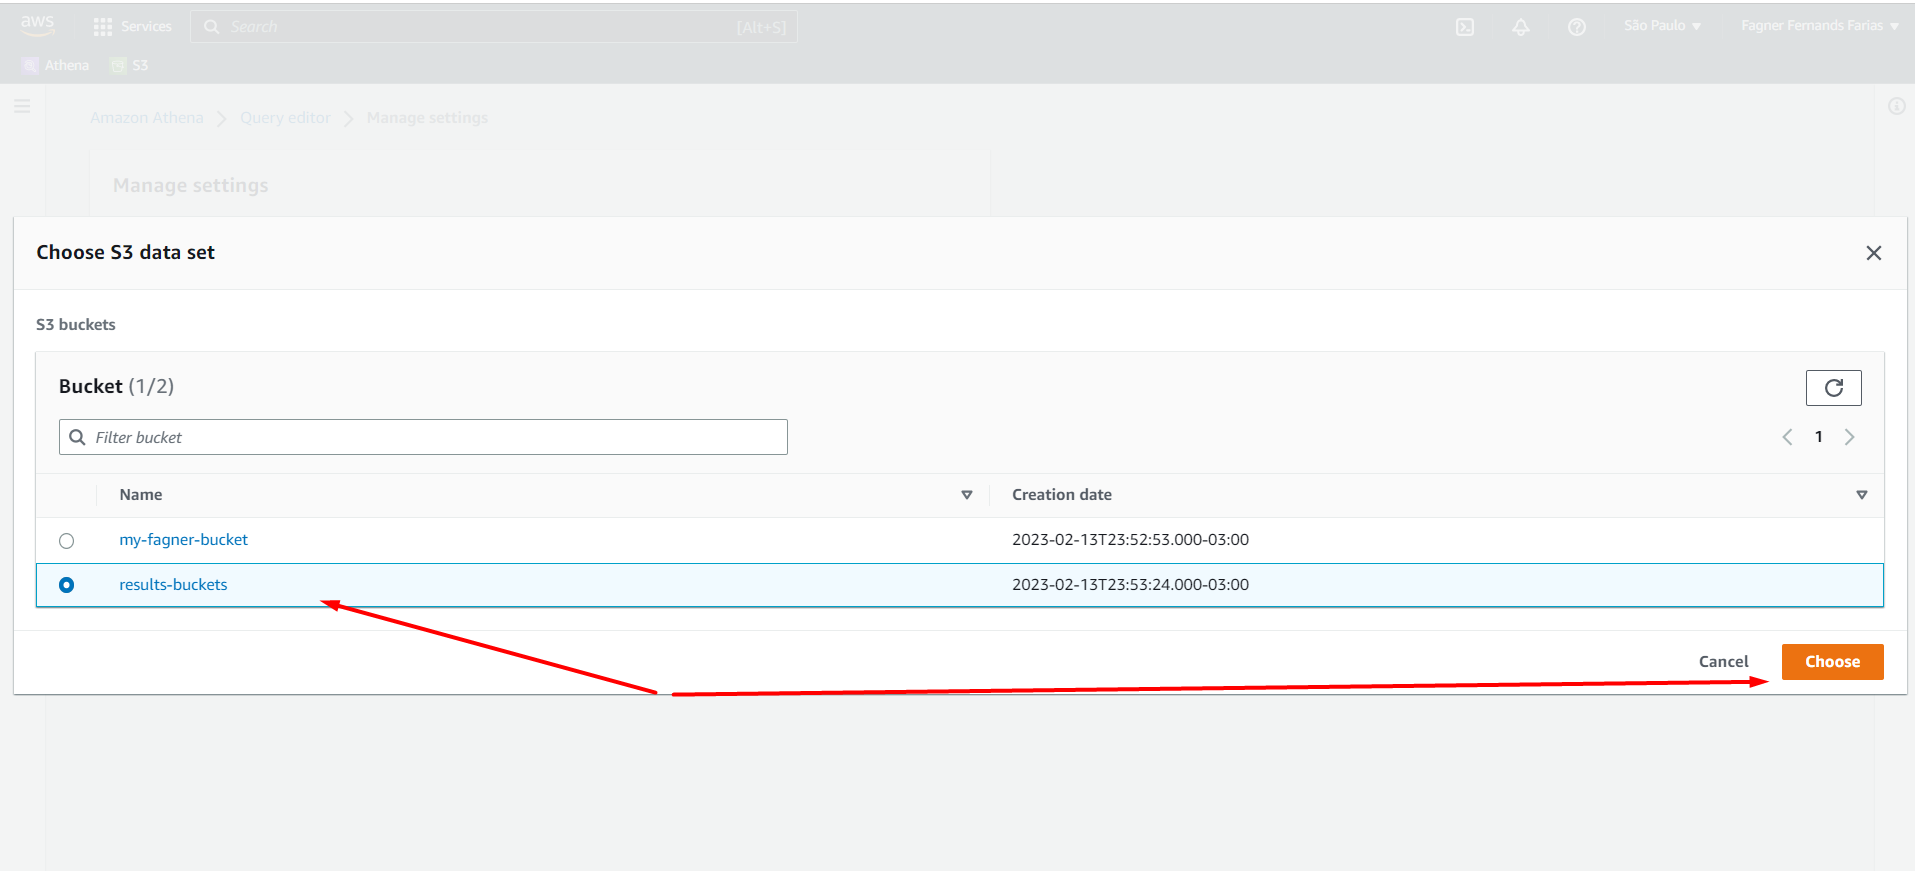

Criando tabela:



```sql
CREATE EXTERNAL TABLE IF NOT EXISTS studants_part(
  gender string,
  parental_level_of_education string,
  lunch string,
  test_preparation_course string,
  math_score int,
  reading_score int,
  writing_score int
  )
PARTITIONED BY (groups string)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) 
LOCATION 's3://fagner-partitioneddata/'
```



## Conhecendo o dataset



 Conhecendo schema



```sql
describe studants_part
```

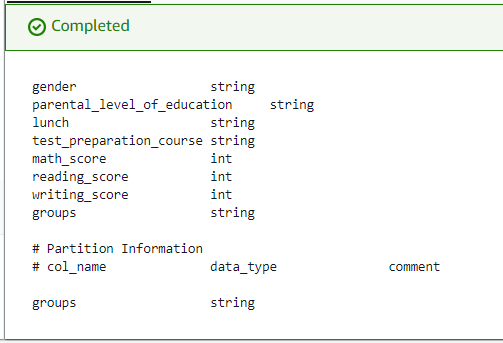





Conhecendo organização dos dados



```sql
select * from studants_part limit 5
```

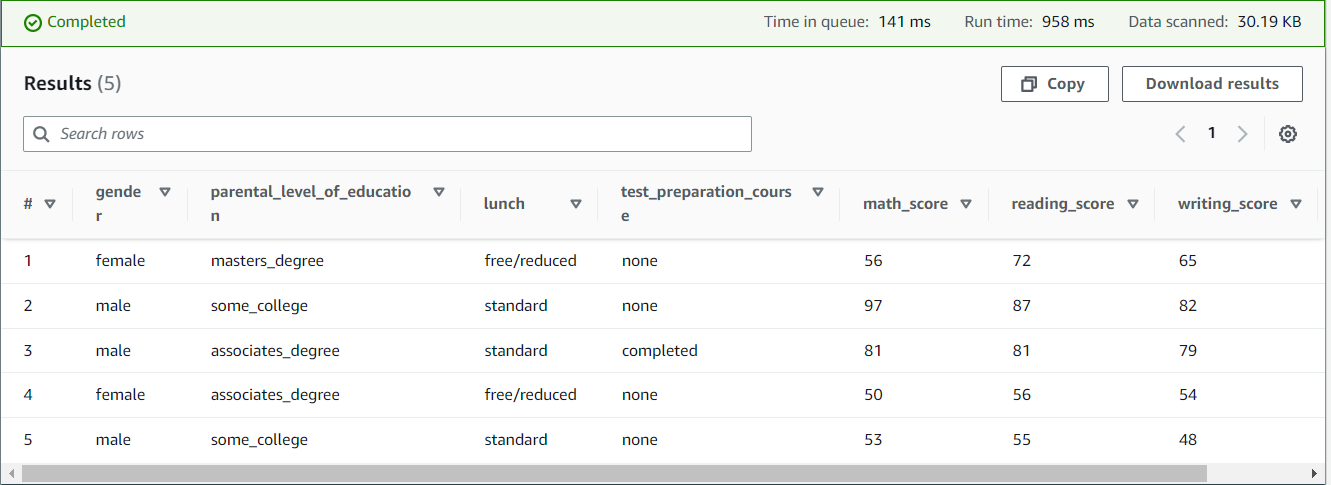

Verificando axistência de na's :



```sql
SELECT *
FROM studants_part
WHERE CONCAT_WS(' ', ARRAY[gender, parental_level_of_education, lunch, test_preparation_course]) = 'na'
```

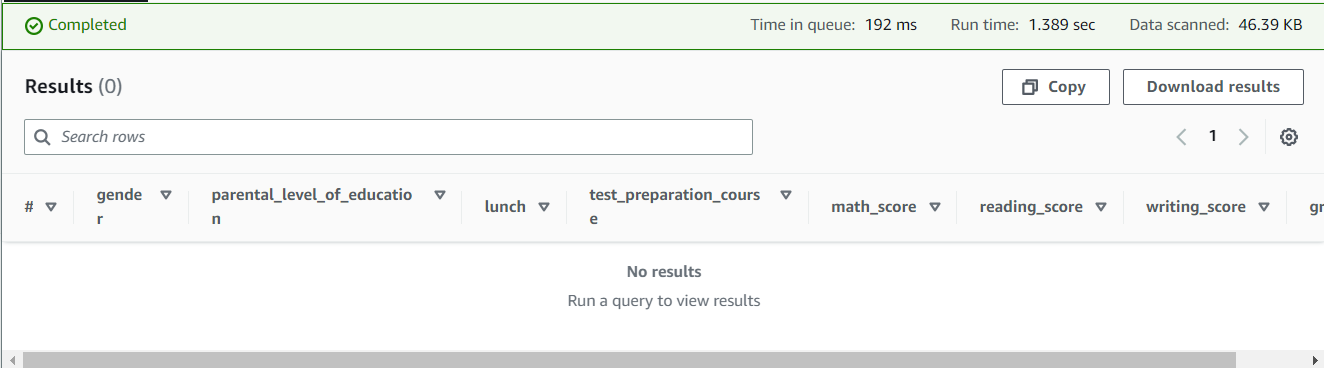




Verificando existência de caracteres não-alfanumericos no dataset

```sql
SELECT *
FROM studants_part
WHERE NOT REGEXP_LIKE(CONCAT_WS(' ', ARRAY[gender, parental_level_of_education, lunch, test_preparation_course]), '[a-zA-Z0-9]')

```
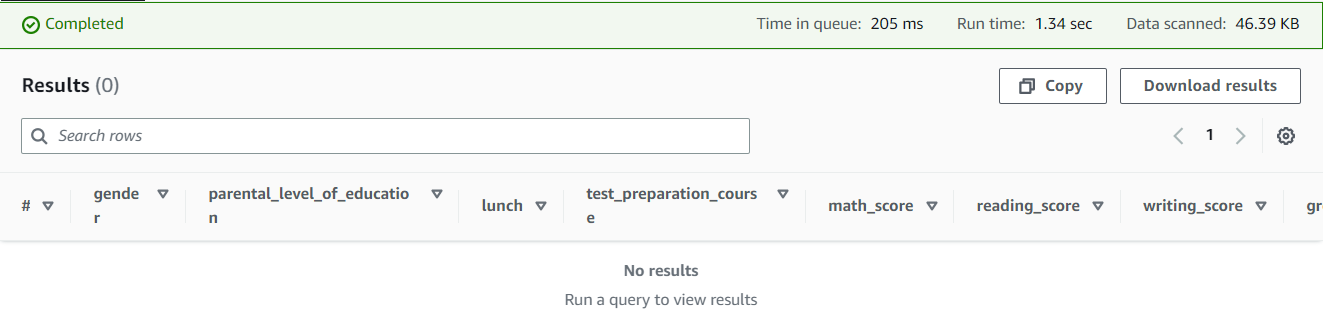


Não existem dados "na", e, todos os dados possuem registros alfa-numéricos.

## Conhecendo as categorias do dataset

Quantos grupos etnicos existem em nosso dataset?



```sql
select count(*) as qtd_grupos_etnicos from
  (select groups from studants_part group by groups)

```

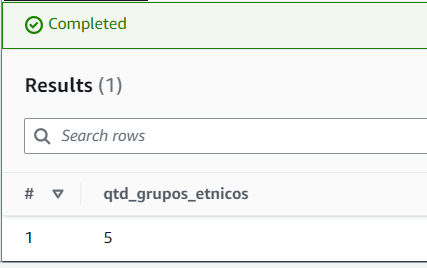


Como estão divididos?

```sql
select groups from studants_part group by groups
```

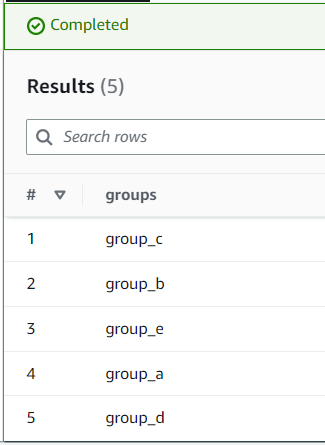

Os grupos, possuem igual quantidade de registros



```sql
select count(*) as "qtd_", groups
from studants_part
group by groups
```
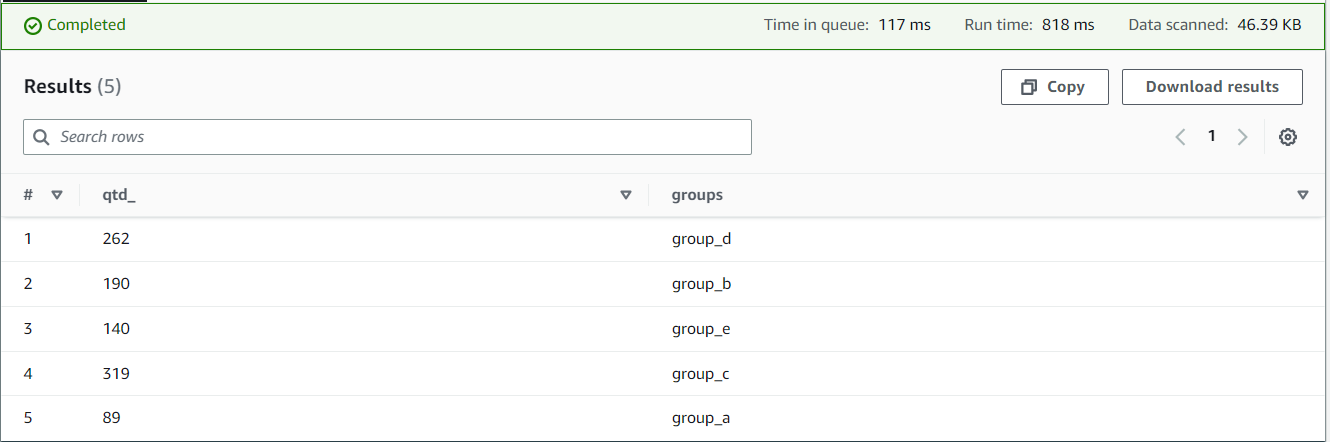


Nossa base de dados parace desbalanceada, visto que, em algumas categorias, existem quase 3 vezes mais registros que em outras. Por isso, não faremos análises cosiderando números em sua forma absoluta, para fazer comparações.

Como estão registrados a formação acadêmica dos pais dos alunos?


```sql
select distinct parental_level_of_education from studants_part
```
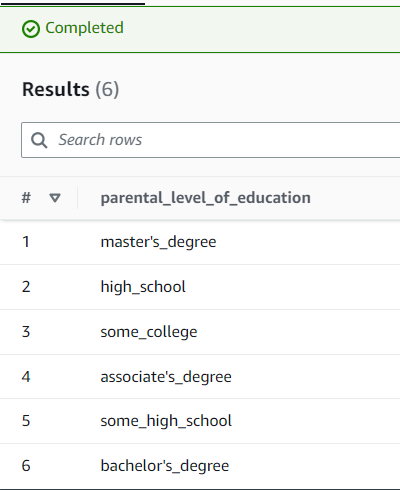



De forma geral, como estão distribuídos os dados por níveis de educação dos pais?



```sql
select count(*) as distribuicao_level_education, parental_level_of_education
from studants_part
group by parental_level_of_education
order by distribuicao_level_education desc;

```
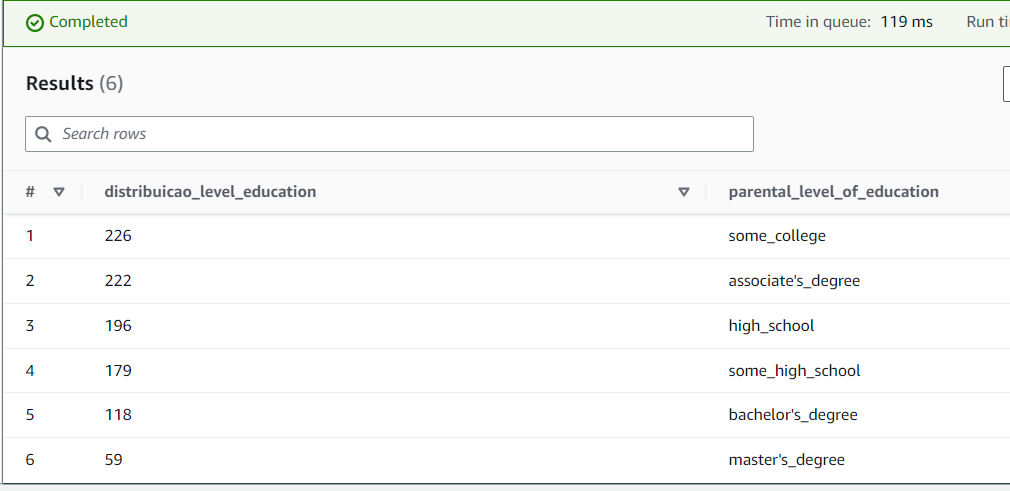


Em relação ao lanche, temos as seguintes categorias:



```sql
select distinct lunch from studants_part group by lunch;
```
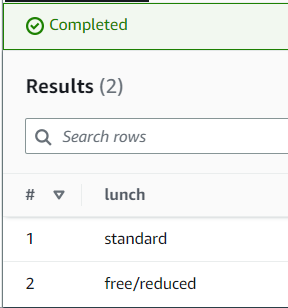


Em relação a preparacao para as provas, temos as seguintes categorias:



```sql
select test_preparation_course from studants_part group by test_preparation_course;
```

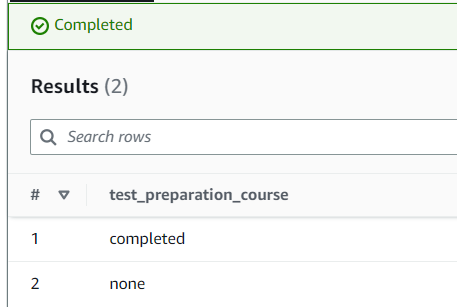

## Iniciando agregação e sumarização dos dados, para responder à motivação da análise.

Notas máximas, por grupo:



```sql
select max(math_score) as "max_math", max(reading_score) as "max_reading", max(writing_score) as "max_writing", groups 
from studants_part
group by groups
```
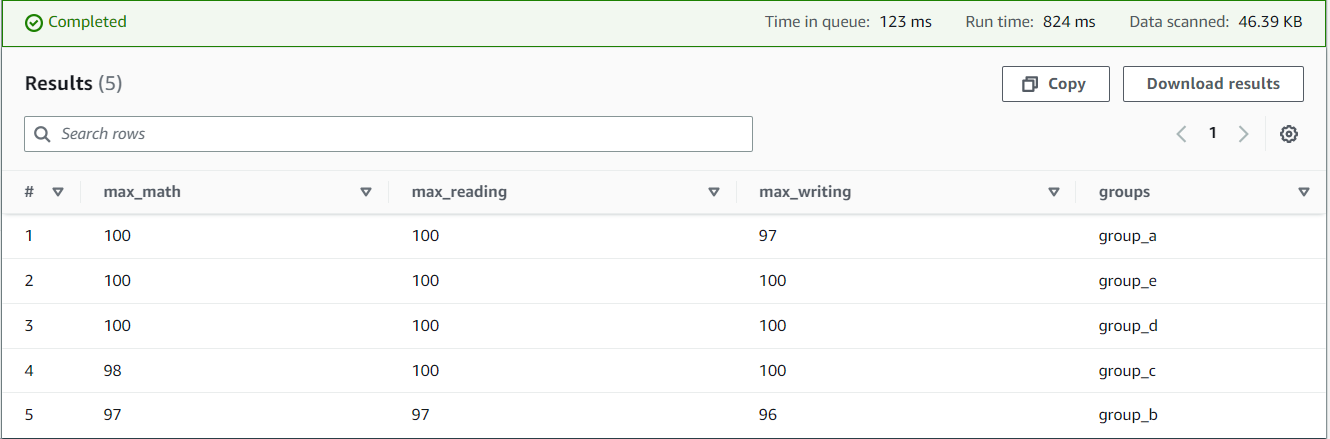


Observa-se que, a nota máxima é 100.

Média de pontuação nas provas, por gênero:



```sql
select
    avg(math_score) as "mean_math",
    avg(reading_score) as "mean_reading",
    avg(writing_score) as "mean_writing",
    gender
from studants_part
group by gender;
```
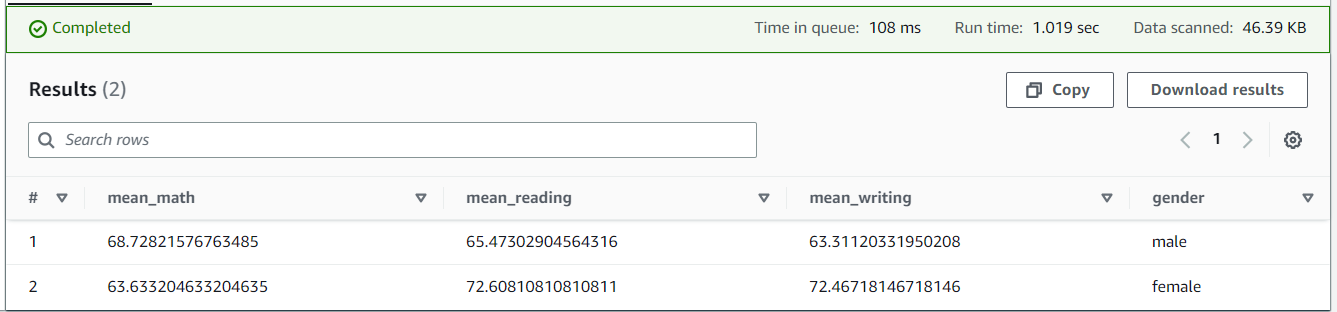




Mulheres possuem melhor desempenho em leitura e escrita, enquanto homens, em matemática.

Média de pontuação nas provas, por grupo:


```sql
select
    avg(math_score) as "mean_math",
    avg(reading_score) as "mean_reading",
    avg(writing_score) as "mean_writing",
    groups
from studants_part
group by groups;
```
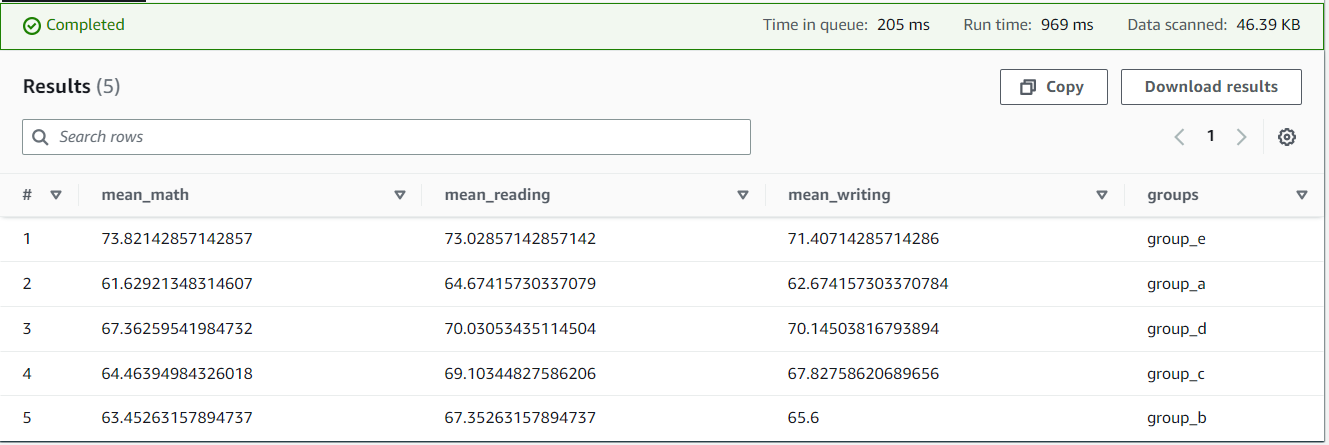


* O grupo e se destacou em todas as médias



Média geral de pontuação nas provas, por nível de educação acadêmica dos pais:


```sql
select parental_level_of_education, round((mean_math + mean_reading + mean_writing) / 3, 2) as "overall_mean"
from(
select parental_level_of_education, 
    avg(math_score) as "mean_math", 
    avg(reading_score) as "mean_reading", 
    avg(writing_score) as "mean_writing"
from studants_part
group by parental_level_of_education)
order by overall_mean desc;
```

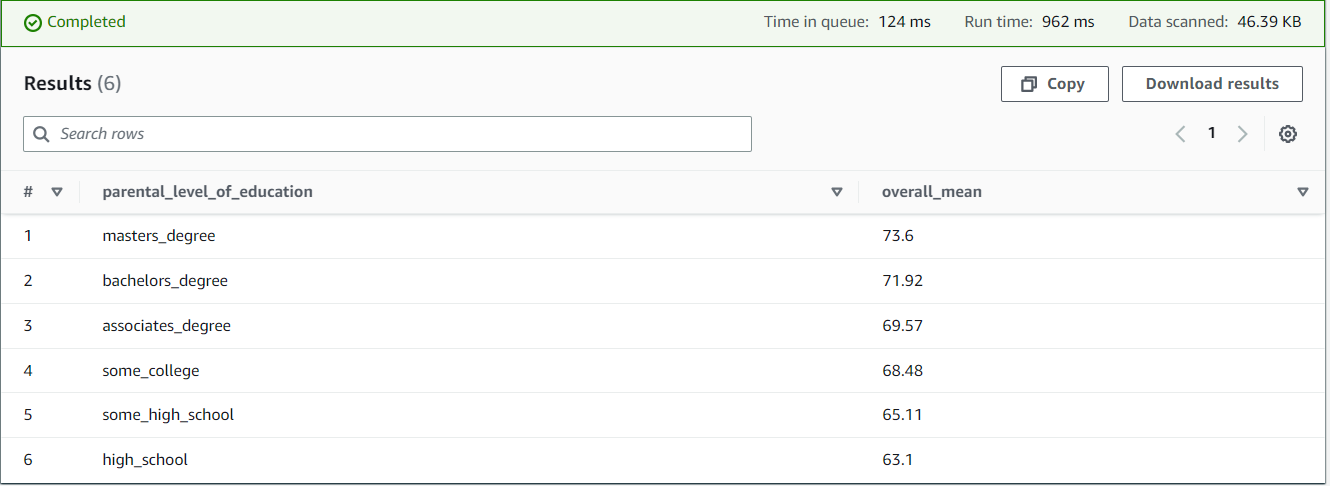



Média de pontuação nas provas, para cada matéria, por nível de educação acadêmica dos pais:

```sql
select parental_level_of_education, 
    avg(math_score) as "mean_math", 
    avg(reading_score) as "mean_reading", 
    avg(writing_score) as "mean_writing"
from studants_part
group by parental_level_of_education
```

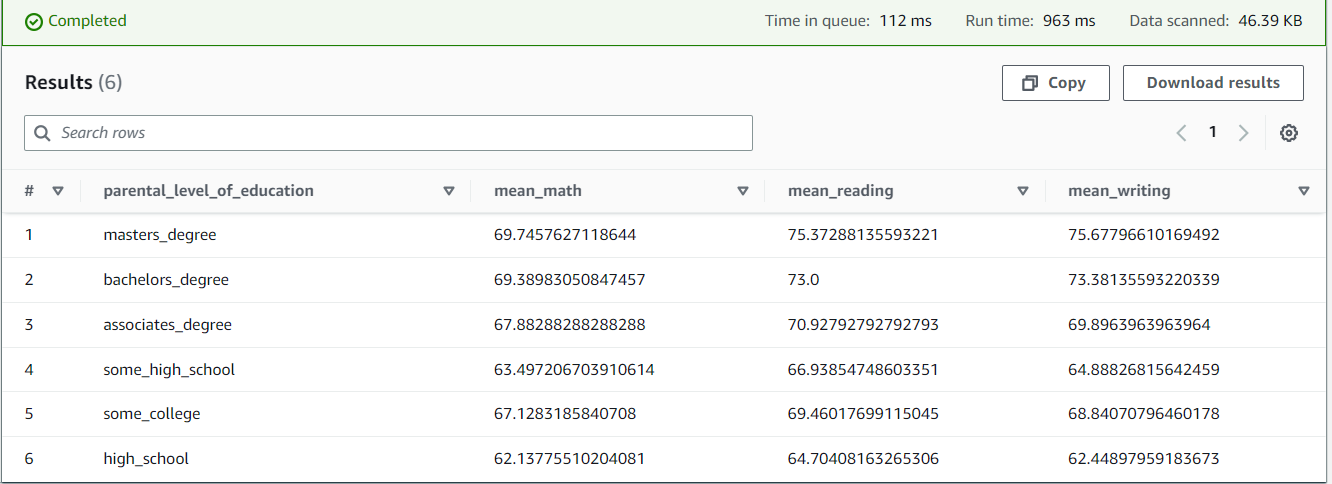




Vamos agrupar os níveis de escolaridade dos pais, para ter uma visão melhor do impacto deste atributo nas médias dos alunos:




```sql
select avg(math_score) as "math_mean", avg(reading_score) as "reading_mean", avg(writing_score) as "writing_mean", formation
from(
SELECT math_score, reading_score, writing_score,
CASE 
           WHEN parental_level_of_education = 'masters_degree' or parental_level_of_education ='bachelors_degree' THEN 'university_education'
           WHEN parental_level_of_education = 'some_high_school' or parental_level_of_education = 'high_school' THEN 'high_school_education'
           ELSE 'not_especified'
END AS formation
FROM studants_part)
group by formation;
```

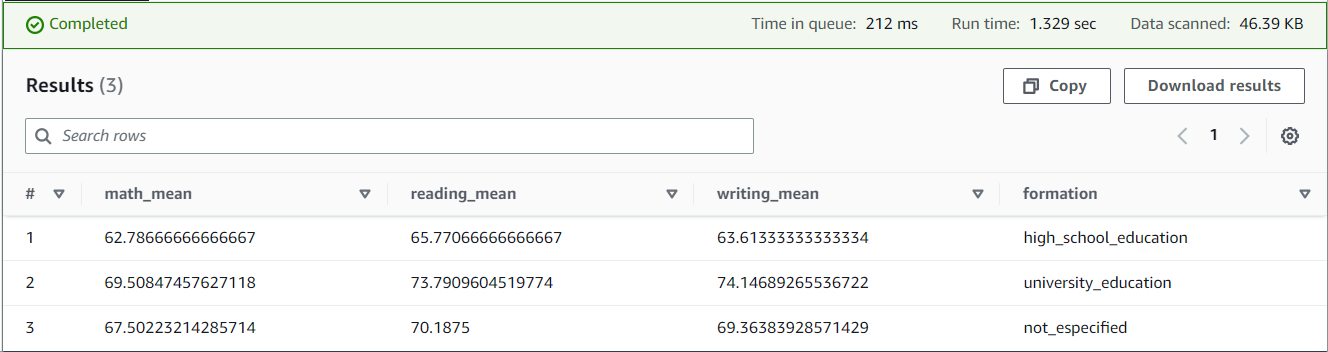





Tem-se um indício, ao menos, de que os alunos cujos pais possuem educação universitária, possuem as melhores notas, na média.


Média de pontuação nas provas, por teste finalizado.

```sql
select test_preparation_course,
avg(math_score) as "mean_math",
avg(reading_score) as "mean_reading",
avg(writing_score) as "mean_writing"
from studants_part group by test_preparation_course;
```

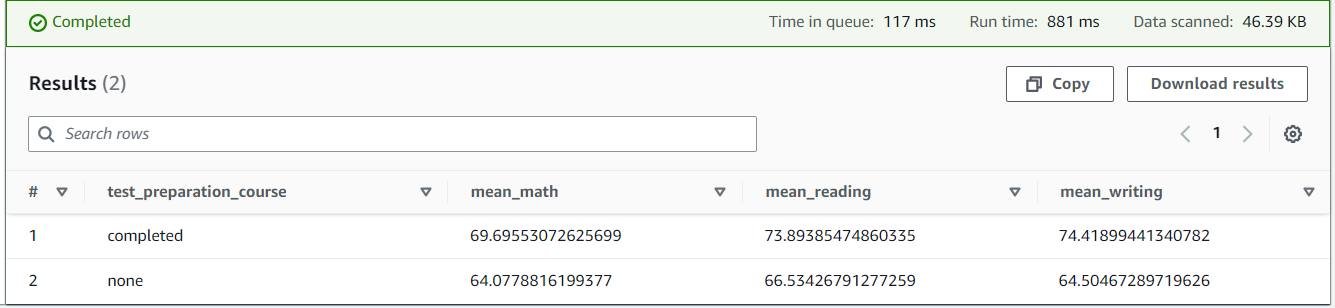

Preparação para o teste completado/não completado, por grupo:



```sql
select test_preparation_course, groups, COUNT(*) as "qtd"
from studants_part group by test_preparation_course, groups
order by groups;
```

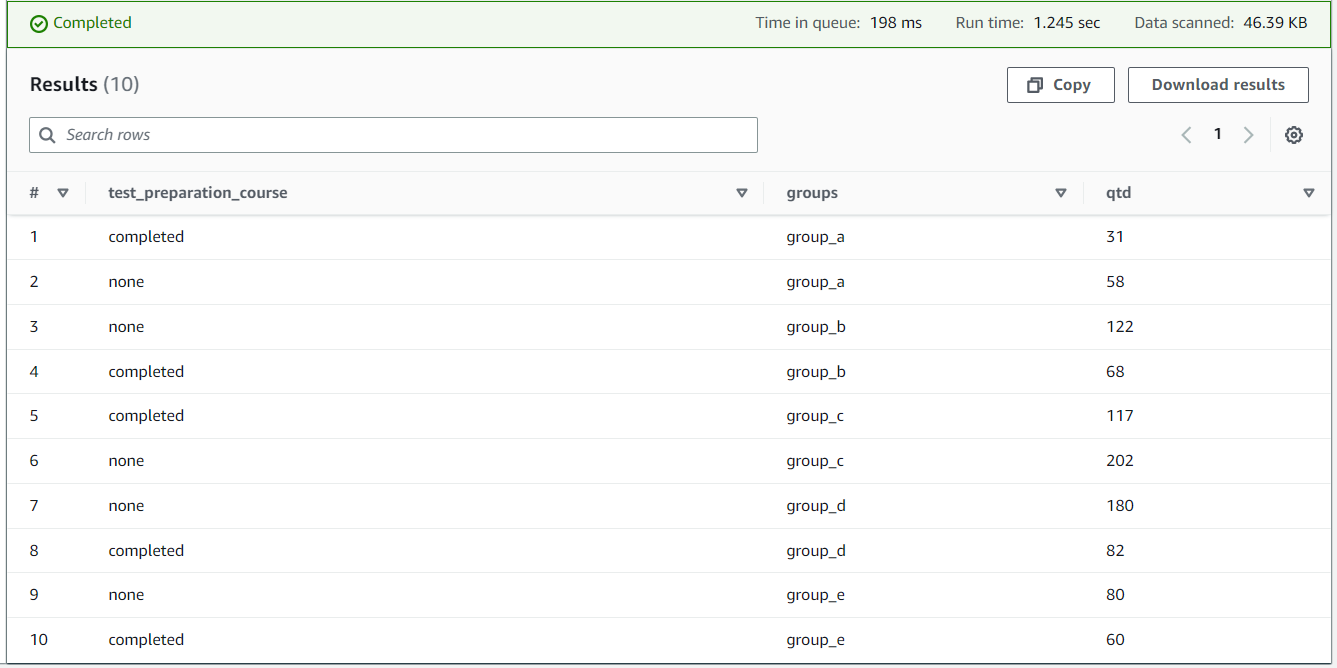

Contagem de pais, por nível de preparação, por grupo:



```sql
select parental_level_of_education, groups, COUNT(*) as "qtd"
from studants_part group by parental_level_of_education, groups
order by groups;
```

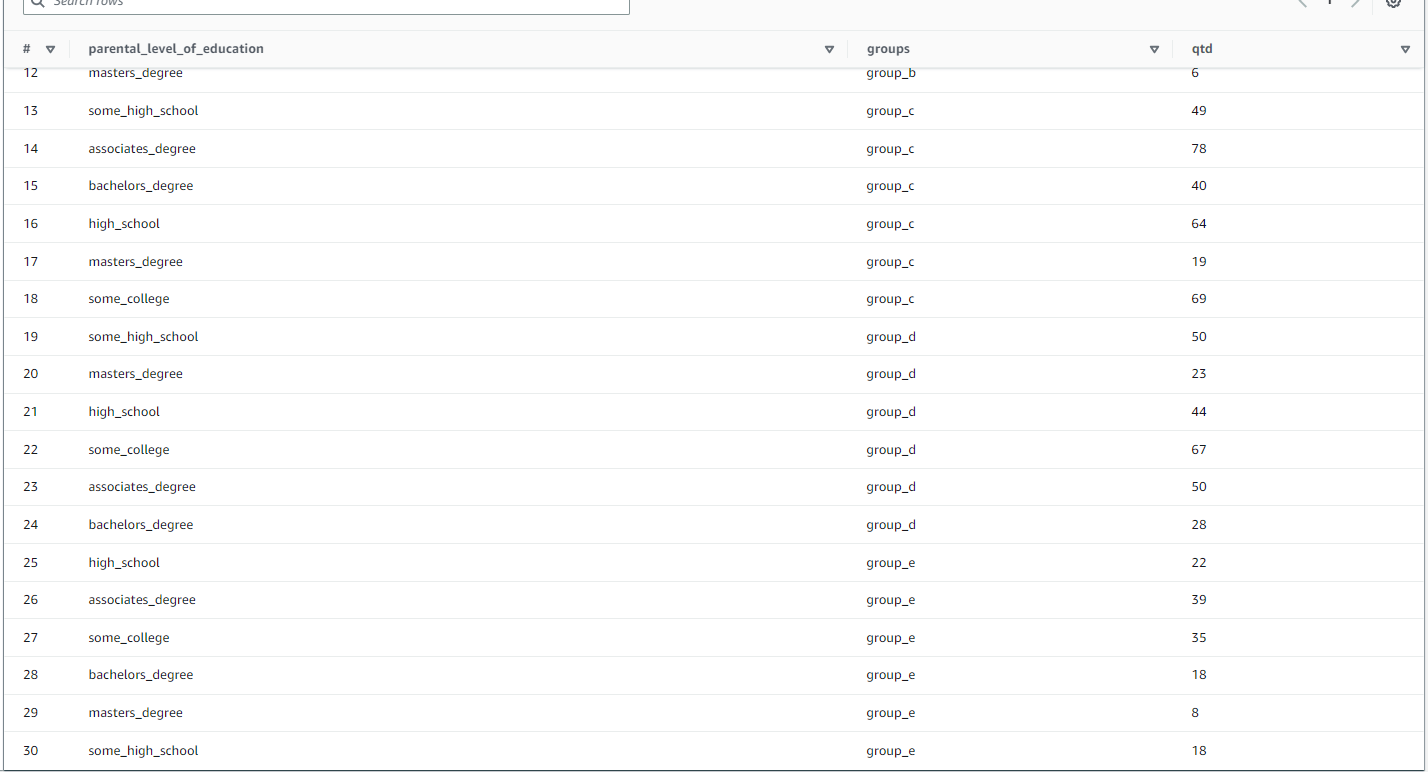

Contagem de pais por formação



```sql
select count(*) as "count_frequencies", formation
from(
SELECT 
CASE 
           WHEN parental_level_of_education = 'masters_degree' or parental_level_of_education ='bachelors_degree' THEN 'university_education'
           WHEN parental_level_of_education = 'some_high_school' or parental_level_of_education = 'high_school' THEN 'high_school_education'
           ELSE 'not_especified'
END AS formation
FROM studants_part)
group by formation;
```
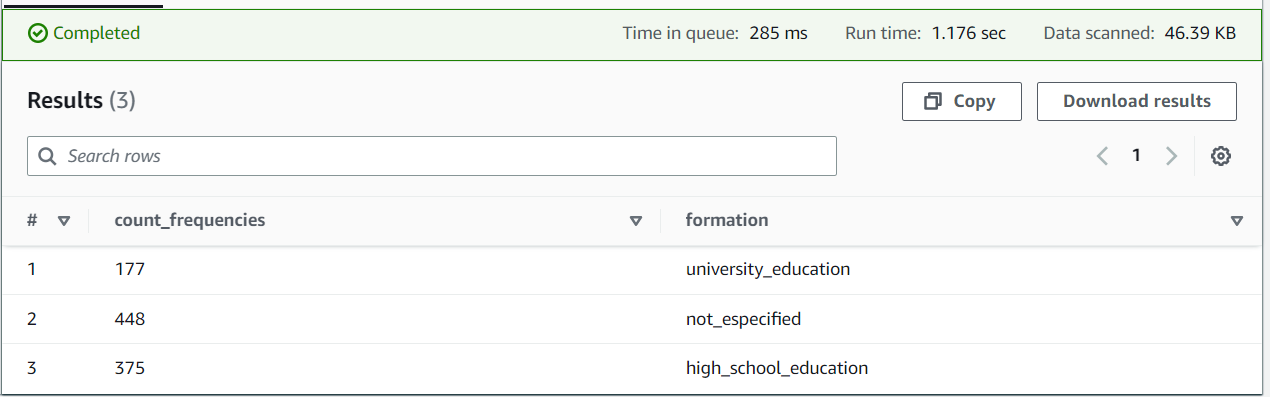


Como estão distribuídos os níveis de formação dos pais, por gruop:



```sql
select count(*) as "count_frequencies", formation, groups
from(
SELECT groups,
CASE 
           WHEN parental_level_of_education = 'masters_degree' or parental_level_of_education ='bachelors_degree' THEN 'university_education'
           WHEN parental_level_of_education = 'some_high_school' or parental_level_of_education = 'high_school' THEN 'high_school_education'
           ELSE 'not_especified'
END AS formation
FROM studants_part)
group by formation, groups
order by groups;
```

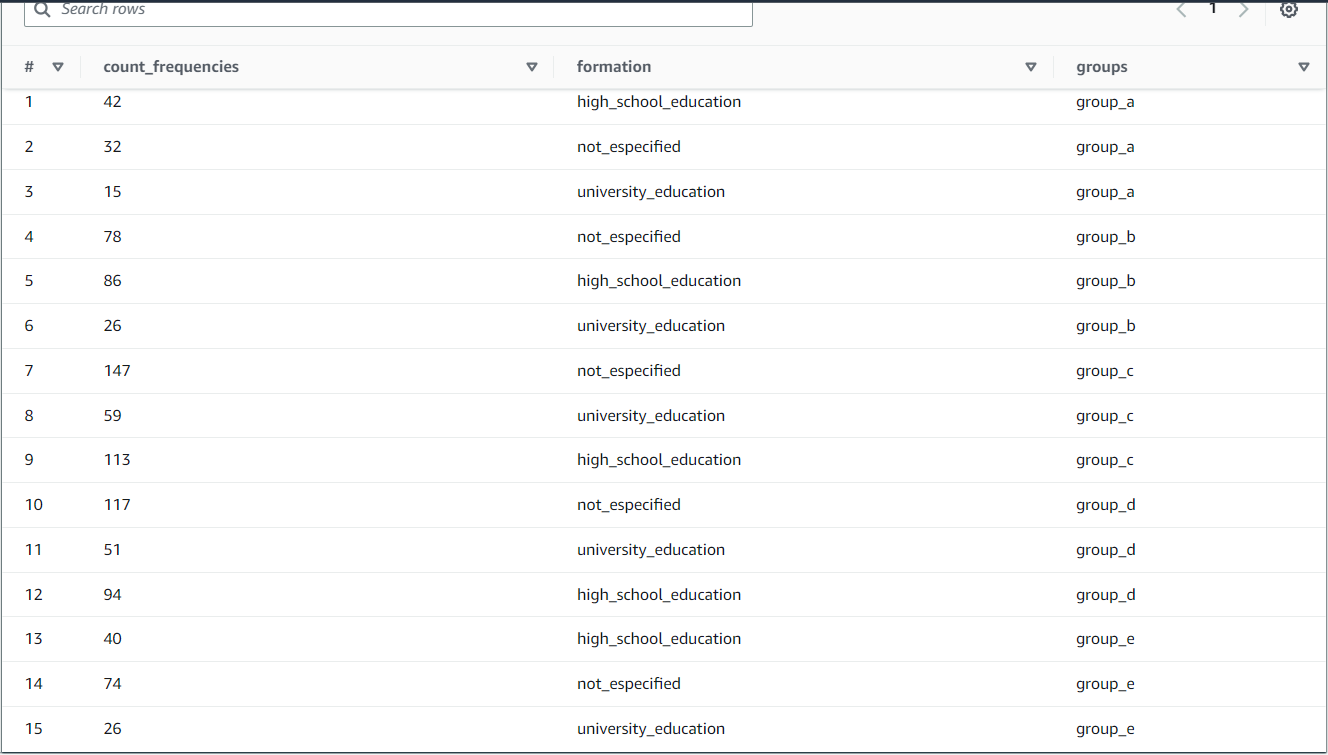



### Iniciando busca por características do grupo_e



```sql
select parental_level_of_education, COUNT(*) as "qtd"
from studants_part
where groups = 'group_e'
group by parental_level_of_education
order by qtd desc;
```
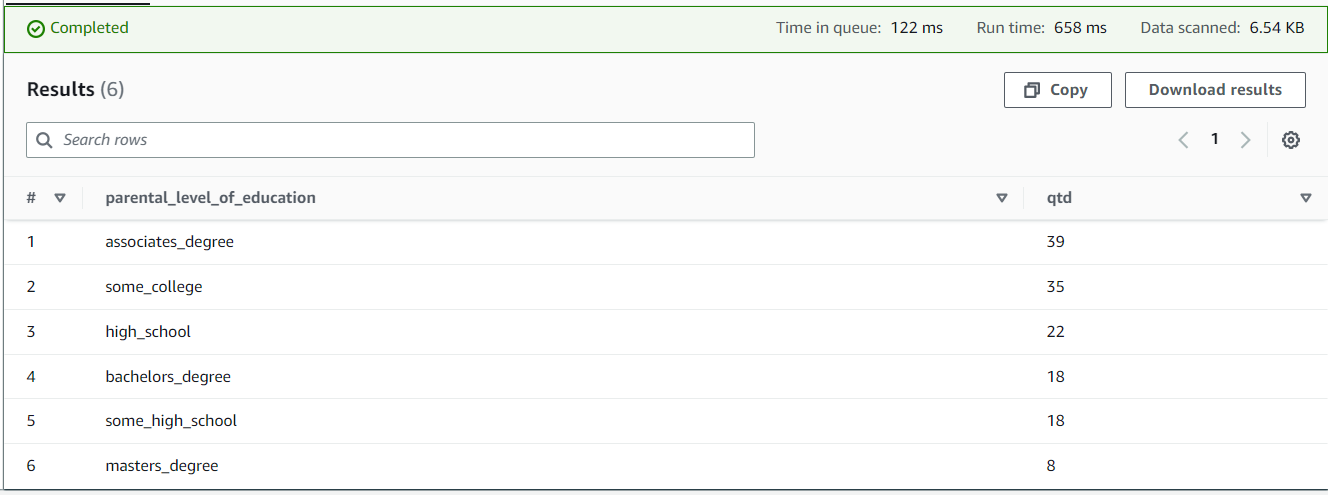



Novamente, vamos agrupar os níves de educação dos pais



```sql
select count(*) as "count_frequencies", formation
from(
SELECT groups,
CASE 
           WHEN parental_level_of_education = 'masters_degree' or parental_level_of_education ='bachelors_degree' THEN 'university_education'
           WHEN parental_level_of_education = 'some_high_school' or parental_level_of_education = 'high_school' THEN 'high_school_education'
           ELSE 'not_especified'
END AS formation
FROM studants_part)
where groups = 'group_e'
group by formation;
```

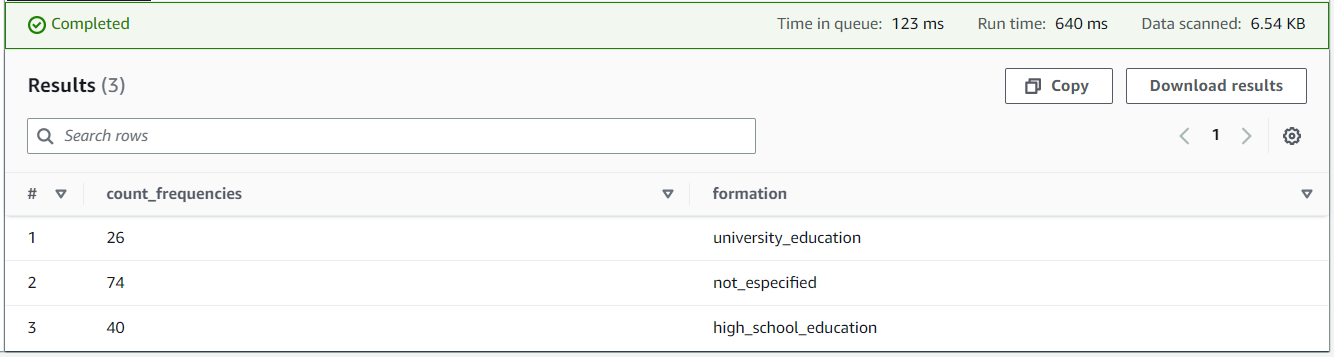

Agora, vamos relacionar a frequencia dos pais, por nível de educação com as médias das notas:



```sql
select count(*) as "count_frequencies",
        avg(math_score) as "mean_math",
        avg(reading_score)as "mean_reading",
        avg(writing_score)as "mean_writing",
        formation
from (
SELECT groups, math_score, reading_score, writing_score,
CASE 
           WHEN parental_level_of_education = 'masters_degree' or parental_level_of_education ='bachelors_degree' THEN 'university_education'
           WHEN parental_level_of_education = 'some_high_school' or parental_level_of_education = 'high_school' THEN 'high_school_education'
           ELSE 'not_especified'
END AS formation
FROM studants_part
    )
where groups = 'group_e'
group by formation;

```
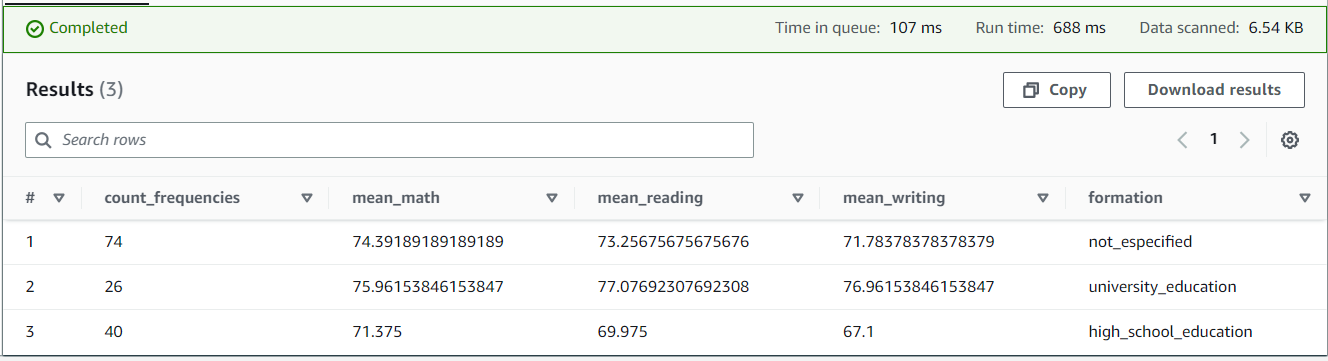

Vamos relacionar o resultado da query anterior, por genero:



```sql
select count(*) as "count_frequencies",
        avg(math_score) as "mean_math",
        avg(reading_score)as "mean_reading",
        avg(writing_score)as "mean_writing",
        formation, gender
from (
SELECT groups, math_score, reading_score, writing_score, gender,
CASE 
           WHEN parental_level_of_education = 'masters_degree' or parental_level_of_education ='bachelors_degree' THEN 'university_education'
           WHEN parental_level_of_education = 'some_high_school' or parental_level_of_education = 'high_school' THEN 'high_school_education'
           ELSE 'not_especified'
END AS formation
FROM studants_part
    )
where groups = 'group_e'
group by formation, gender
order by formation;

```
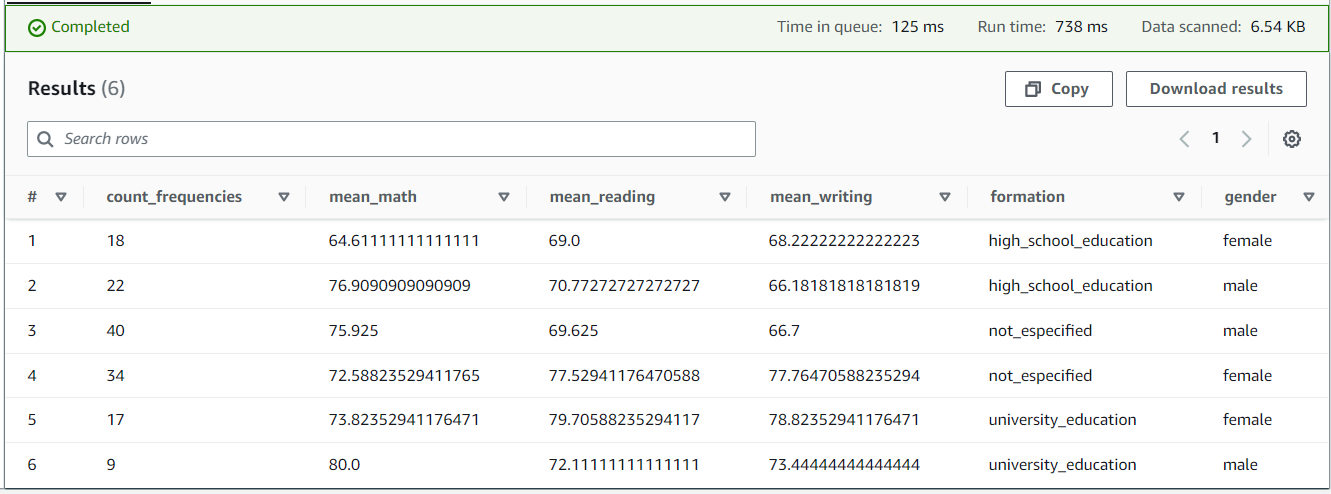


## Respondendo à motivação da pesquisa

Vamos relacionar o mesmo resultado, com os o curso de preparação terminaram/não terminaram:



```sql
select count(*) as "count_frequencies",
        avg(math_score) as "mean_math",
        avg(reading_score)as "mean_reading",
        avg(writing_score)as "mean_writing",
        round((avg(math_score)+avg(reading_score)+avg(writing_score))/3, 2) as "overall_mean",
        formation, test_preparation_course, groups
from (
SELECT groups, math_score, reading_score, writing_score, test_preparation_course,
CASE 
           WHEN parental_level_of_education = 'masters_degree' or parental_level_of_education ='bachelors_degree' THEN 'university_education'
           WHEN parental_level_of_education = 'some_high_school' or parental_level_of_education = 'high_school' THEN 'high_school_education'
           ELSE 'not_especified'
END AS formation
FROM studants_part
    )
group by formation, test_preparation_course, groups
order by groups, formation, test_preparation_course;
```
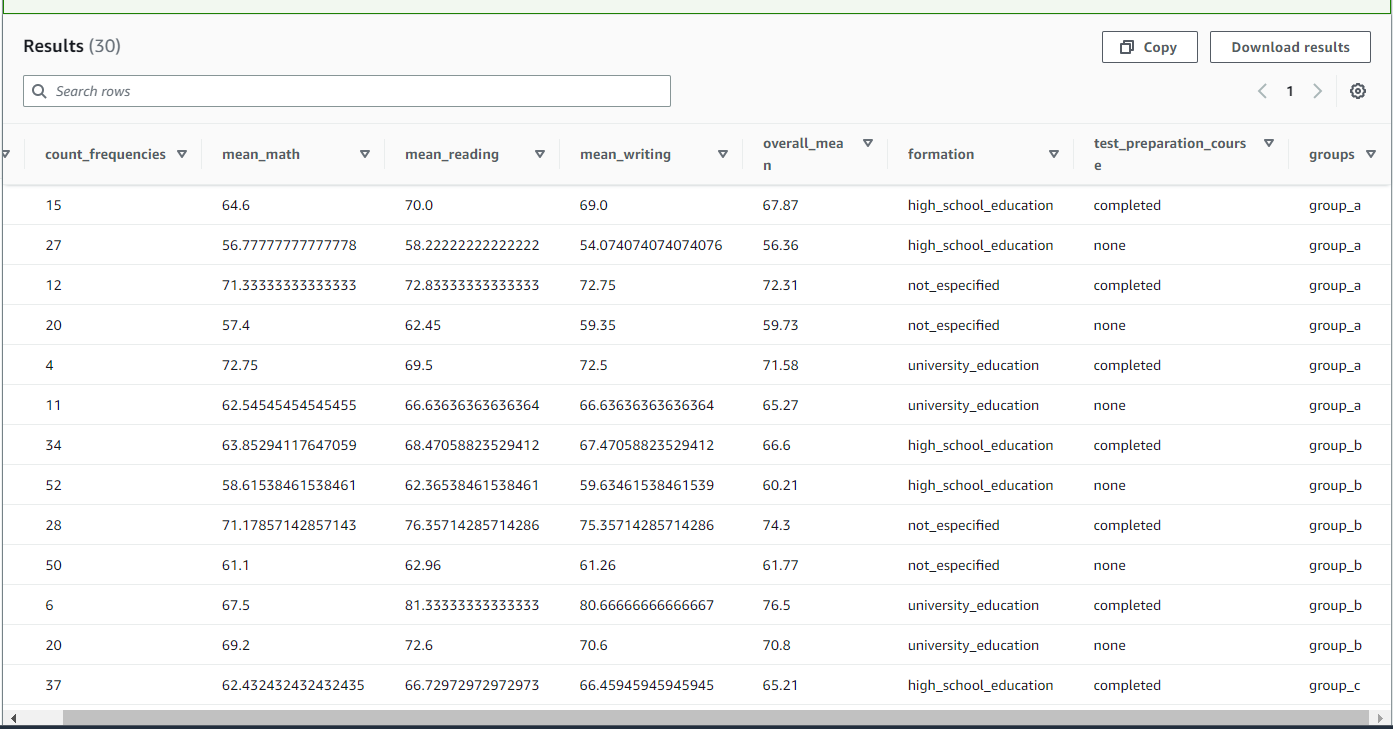


Vamos representar os dados graficamente:

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# Lendo dados
results = pd.DataFrame(pd.read_csv("results.csv"))

# Visualizando dados
results.head()

,count_frequencies,mean_math,mean_reading,mean_writing,overall_mean,formation,test_preparation_course,groups
0,15,64.600000,70.000000,69.000000,67.87,high_school_education,completed,group_a
1,27,56.777778,58.222222,54.074074,56.36,high_school_education,none,group_a
2,12,71.333333,72.833333,72.750000,72.31,not_especified,completed,group_a
3,20,57.400000,62.450000,59.350000,59.73,not_especified,none,group_a
4,4,72.750000,69.500000,72.500000,71.58,university_education,completed,group_a


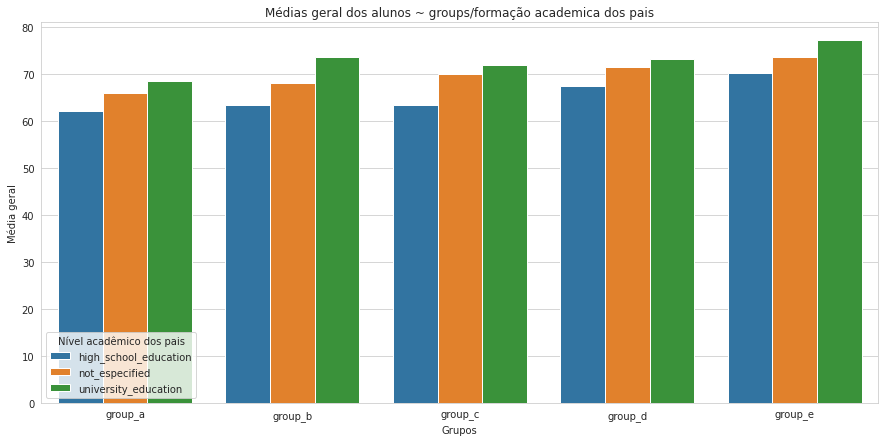

In [53]:
# Plotando dados
with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize = (15,7))
  grafico = sns.barplot(data = results, y = 'overall_mean', x = 'groups', hue = 'formation', ci = False)
  grafico.set(title = 'Médias geral dos alunos ~ groups/formação academica dos pais',
              xlabel = 'Grupos', ylabel = 'Média geral')
  grafico.legend(title = 'Nível acadêmico dos pais')

O gráfico confirma um indício percebido ao longo da análise, que o grupo étnico "e" (group_e), se destaca em vários aspectos.

Observe-se, a título de exemplo, que, no group_e, mesmo quando os pais dos alunos não possuem formação acadêmica universitária, as médias das notas ainda são superiores à todas as médias do grupo "a" (group_a).

Também, a princípio, a maior média obtida (>75) foi no grupo "e", no sub-grupo dos alunos cujos pais dos alunos possuem educação universitária.

Verifiquemos, então, mais algumas características desse grupo.

Para finalizar, vamos relacionar o mesmo resultado, com alunos do group_e que finalizaram o curso de preparação, com os que não terminaram:



```sql
select count(*) as "count_frequencies",
        avg(math_score) as "mean_math",
        avg(reading_score)as "mean_reading",
        avg(writing_score)as "mean_writing",
        round((avg(math_score)+avg(reading_score)+avg(writing_score))/3, 2) as "overall_mean",
        formation, test_preparation_course
from (
SELECT groups, math_score, reading_score, writing_score, test_preparation_course,
CASE 
           WHEN parental_level_of_education = 'masters_degree' or parental_level_of_education ='bachelors_degree' THEN 'university_education'
           WHEN parental_level_of_education = 'some_high_school' or parental_level_of_education = 'high_school' THEN 'high_school_education'
           ELSE 'not_especified'
END AS formation
FROM studants_part
    )
where groups = 'group_e'
group by formation, test_preparation_course
order by formation;
```
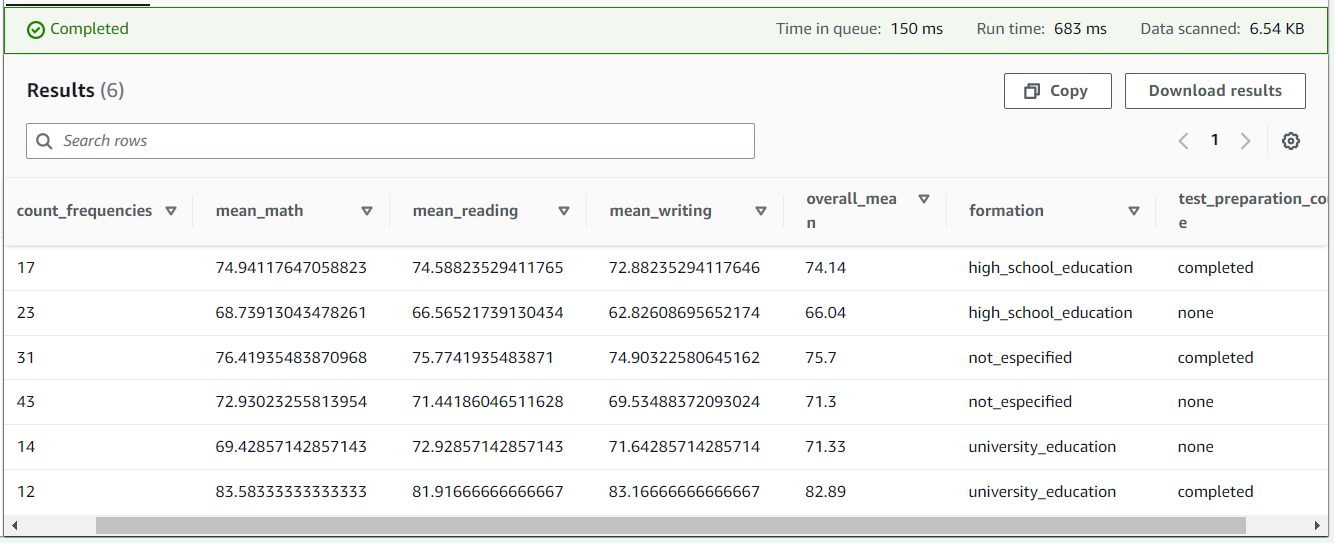

Vamos representar esse resultado graficamente

In [22]:
# Lendo dados
final_results = pd.DataFrame(pd.read_csv("final_results.csv"))

# Visualizando dados
final_results

,count_frequencies,mean_math,mean_reading,mean_writing,overall_mean,formation,test_preparation_course
0,17,74.941176,74.588235,72.882353,74.14,high_school_education,completed
1,23,68.739130,66.565217,62.826087,66.04,high_school_education,none
2,31,76.419355,75.774194,74.903226,75.70,not_especified,completed
3,43,72.930233,71.441860,69.534884,71.30,not_especified,none
4,14,69.428571,72.928571,71.642857,71.33,university_education,none
5,12,83.583333,81.916667,83.166667,82.89,university_education,completed


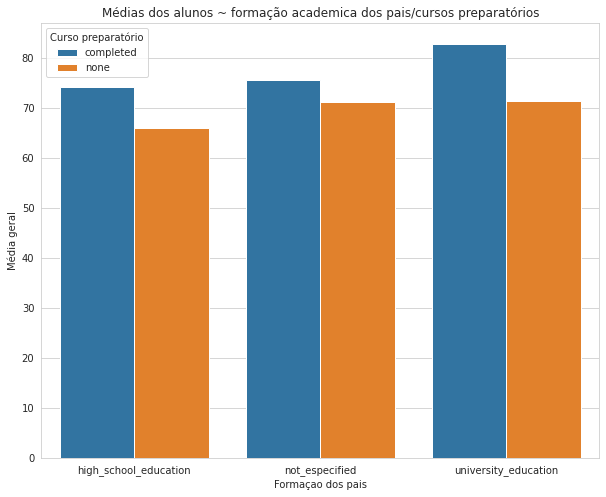

In [24]:
# Plotando resultados

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize = (10,8))
  grafico = sns.barplot(data = final_results, y = 'overall_mean', x = 'formation', hue = 'test_preparation_course')
  grafico.set(title = 'Médias dos alunos ~ formação academica dos pais/cursos preparatórios',
              xlabel = 'Formaçao dos pais', ylabel = 'Média geral')
  grafico.legend(title = 'Curso preparatório')

## Conclusão:

  - Ficou caracterizada a influência de dois fatores nas notas dos alunos: 
     
            I - a formação acadêmica dos pais,
            II - a conclusão dos cursos preparatórios.

Explicando:

Em relação à formação acadêmica dos pais, ficou bastante caracterizado, no primeiro gráfico que há influência na nota obtida pelo aluno, sendo que, a maior média obtida é, justamente, do grupo de alunos cujos pais possuem educação acadêmica, e, a menor média é a dos alunos cujos pais frequentaram apenas o ensino médio.

Em relação ao segundo fator, já no segundo gráfico, percebe-se que, realizando novo split no grupo_e, a média das notas sobe ainda mais. Os alunos do group_e, **cujos pais tem formação universitária**, e, os alunos **finalizaram os cursos preparatórios**, a média foi superior a 80.

Portanto, validada a hipótese de que, a formação acadêmica dos pais, e a realização de cursos preparatórios ajudam no desempenho dos alunos.